In [4]:
#importing all libraries
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

In [1]:
pip install --upgrade pandas

In [1]:
#importing files in google colab
from google.colab import files
uploaded = files.upload()


Saving Crimes.csv to Crimes.csv


In [5]:
#Reading the file and storing it in df2
df2 = pd.read_csv('Crimes.csv',engine='python', encoding='utf-8', error_bad_lines=False)
df2.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,9/5/2015 13:30,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,2/10/2018 15:50,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,9/4/2015 11:30,008XX N CENTRAL AVE,870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,6,1138875.0,1904869.0,2015,2/10/2018 15:50,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,9/1/2018 0:01,082XX S INGLESIDE AVE,810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,6,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN
3,10224740,HY411595,9/5/2015 12:45,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,2/10/2018 15:50,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,9/5/2015 13:00,0000X N LARAMIE AVE,560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,2/10/2018 15:50,41.881903,-87.755121,"(41.881903443, -87.755121152)"


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


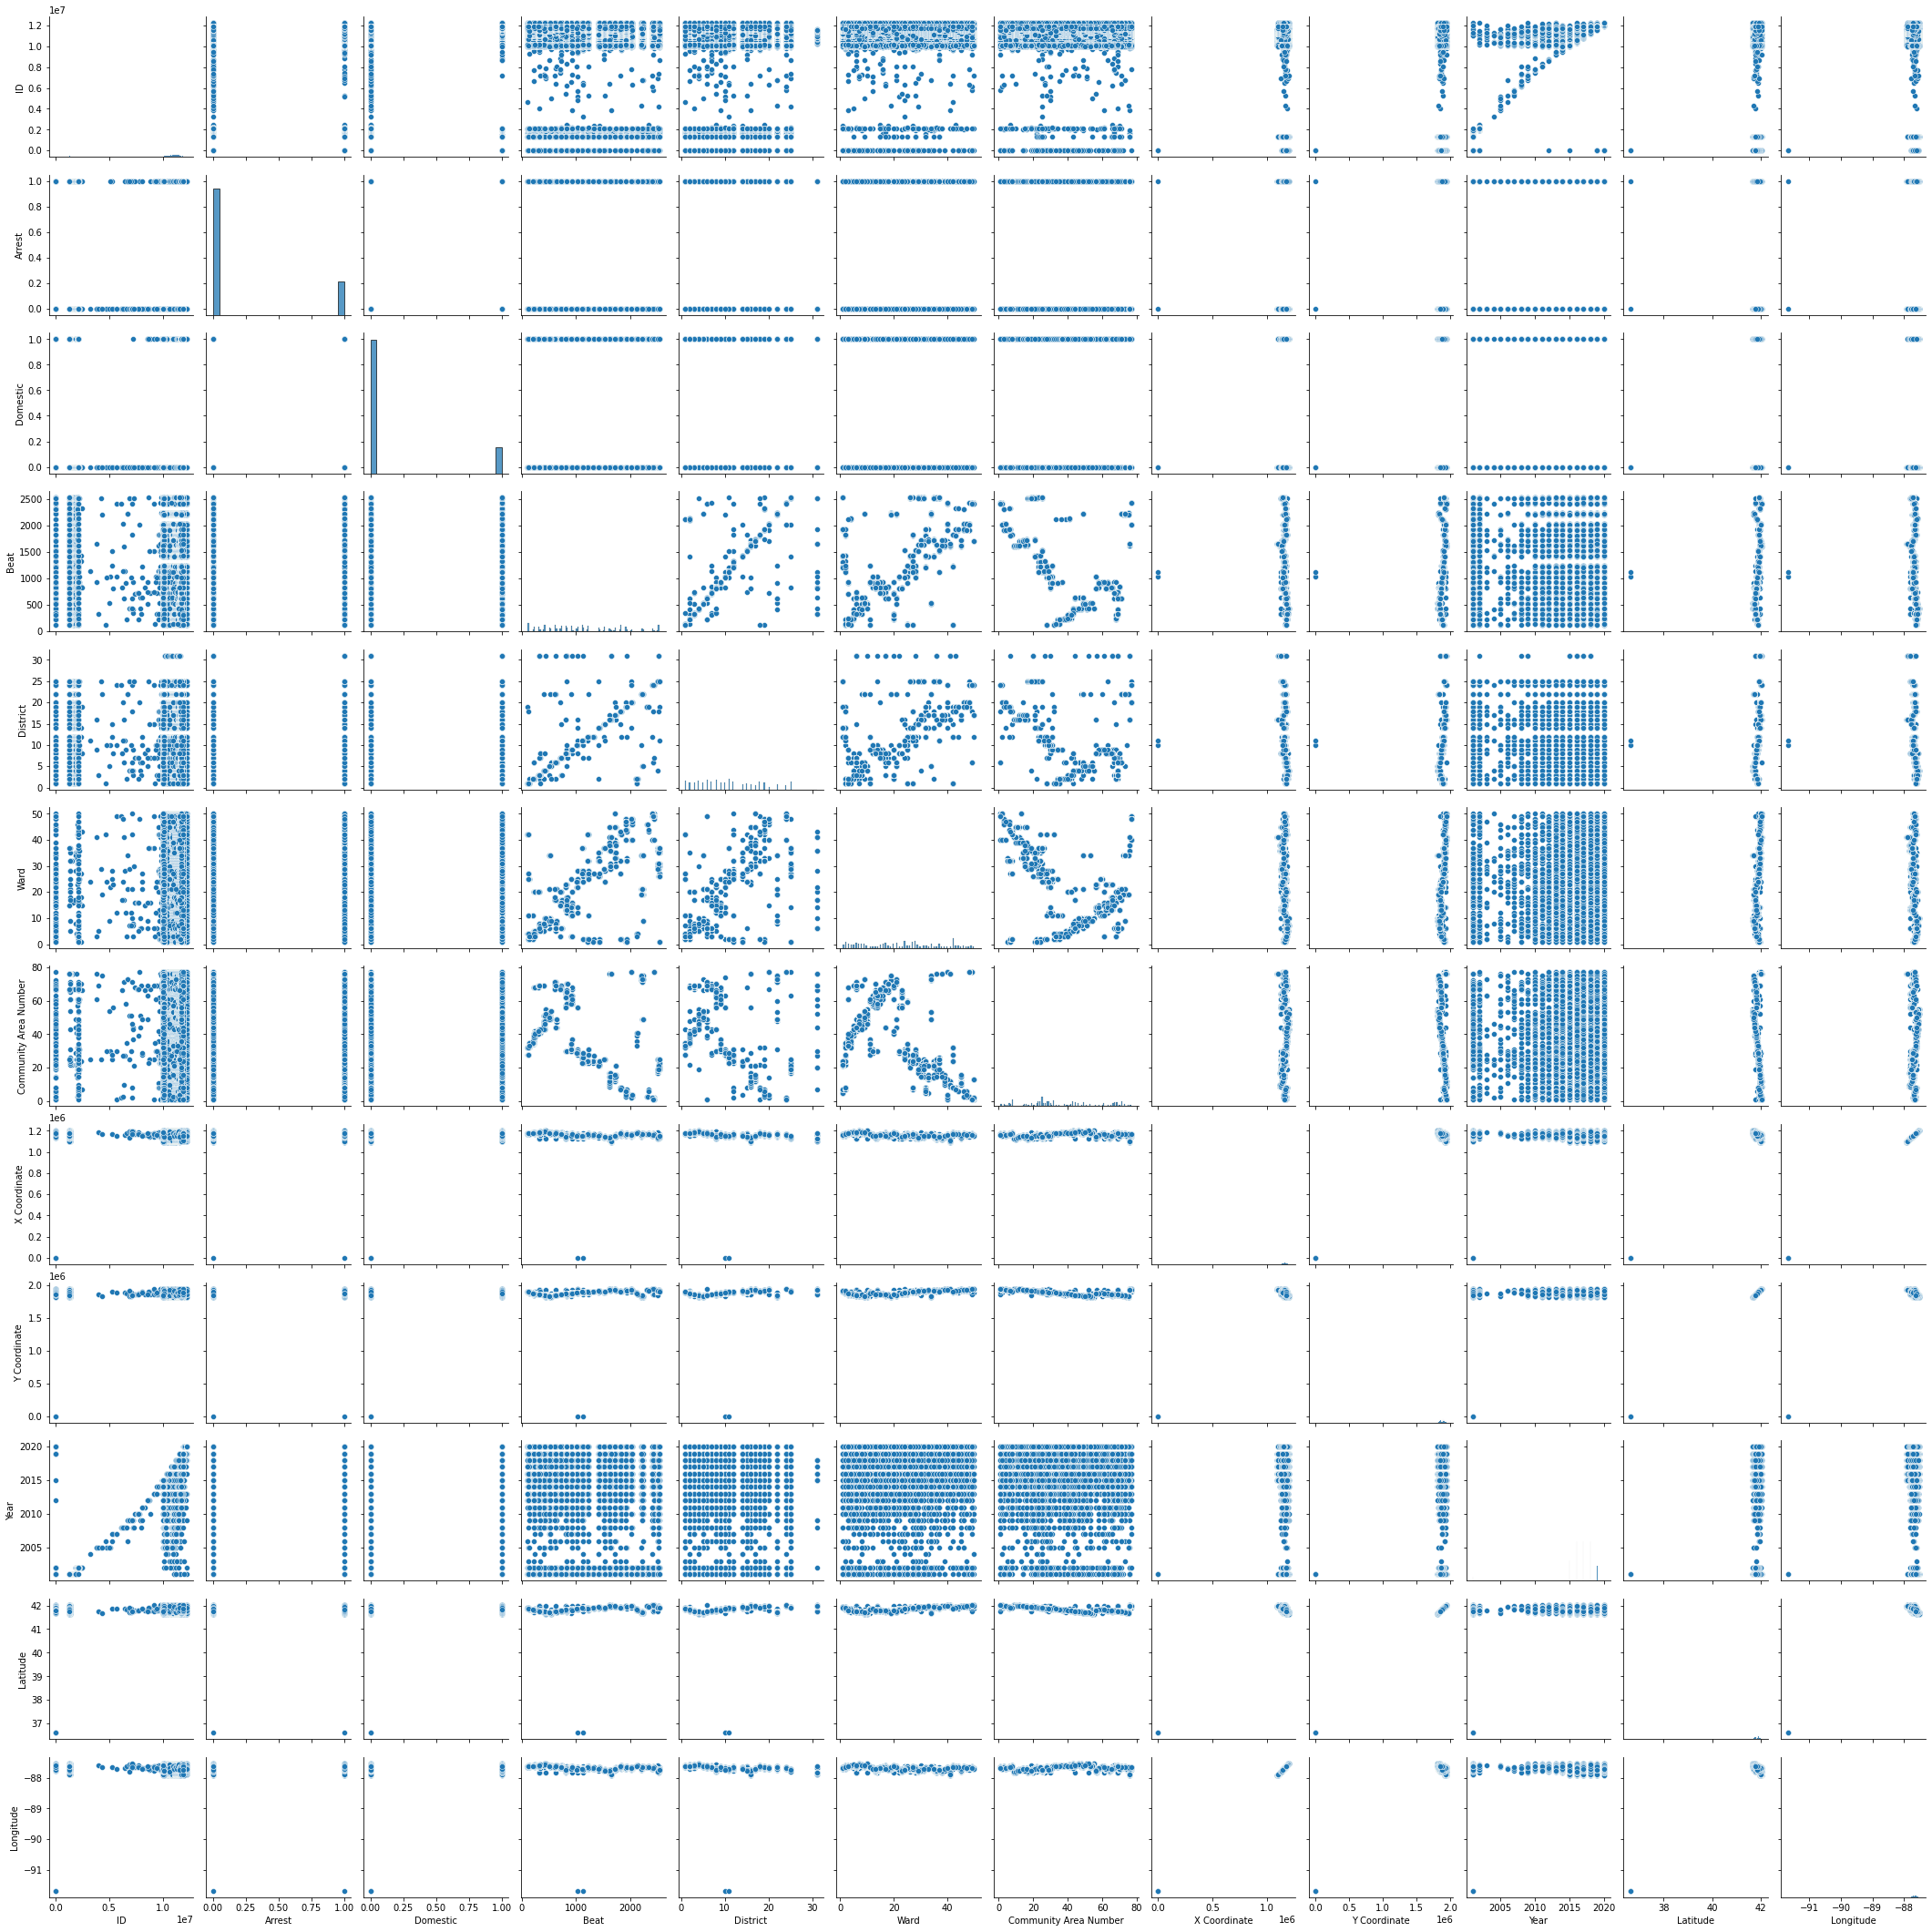

In [ ]:
sns.pairplot(df2)

In [5]:
df2.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [6]:
df2.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.048575e+06,1.048575e+06,1.048574e+06,1.022393e+06,1.022505e+06,1.043445e+06,1.043445e+06,1.048575e+06,1.043445e+06,1.043445e+06
mean,1.071838e+07,1.145093e+03,1.120268e+01,2.318467e+01,3.677866e+01,1.164802e+06,1.886400e+06,2.016532e+03,4.184387e+01,-8.767074e+01
std,1.577026e+06,6.956329e+02,6.945263e+00,1.400812e+01,2.138778e+01,1.626174e+04,3.126615e+04,2.781713e+00,8.598883e-02,5.917179e-02
min,1.007000e+03,1.110000e+02,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,1.054175e+07,6.120000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.153083e+06,1.859328e+06,2.016000e+03,4.176935e+01,-8.771326e+01
50%,1.096418e+07,1.031000e+03,1.000000e+01,2.400000e+01,3.200000e+01,1.166563e+06,1.893573e+06,2.017000e+03,4.186375e+01,-8.766429e+01
75%,1.133608e+07,1.713000e+03,1.700000e+01,3.400000e+01,5.400000e+01,1.176439e+06,1.908825e+06,2.018000e+03,4.190556e+01,-8.762786e+01
max,1.224939e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951535e+06,2.020000e+03,4.202267e+01,-8.752453e+01


In [7]:
#Uploading the census data
from google.colab import files
uploaded = files.upload()

Saving Census_Data.csv to Census_Data.csv


In [6]:
#Storing census data in census variable
census = pd.read_csv('Census_Data.csv')

In [7]:
census

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
...,...,...,...,...,...,...,...,...,...
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0
76,77.0,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0


In [8]:
# Modifying the column community area to community area number to map the corresponding data in the census file
df2 = df2.rename(columns={'Community Area': 'Community Area Number'})

In [9]:
#Identifying and removing the unwanted column
census = census.drop(census.columns[[6, 8]], axis=1)

In [12]:
#checking null values
census.isnull().sum()

Community Area Number                           1
COMMUNITY AREA NAME                             0
PERCENT OF HOUSING CROWDED                      0
PERCENT HOUSEHOLDS BELOW POVERTY                0
PERCENT AGED 16+ UNEMPLOYED                     0
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    0
PER CAPITA INCOME                               0
dtype: int64

In [10]:
#Merging 2 dataset with the common column between the 2 dataset
merge_df = pd.merge(df2, census, on='Community Area Number')

In [14]:
merge_df.dtypes

ID                                                int64
Case Number                                      object
Date                                             object
Block                                            object
IUCR                                             object
Primary Type                                     object
Description                                      object
Location Description                             object
Arrest                                             bool
Domestic                                           bool
Beat                                              int64
District                                        float64
Ward                                            float64
Community Area Number                           float64
FBI Code                                         object
X Coordinate                                    float64
Y Coordinate                                    float64
Year                                            

In [11]:
#Setting the ID column as index value
merge_df.set_index("ID", inplace = True)

In [12]:
#Converting date and updated column to pandas datetime format
# Primary type,location description and community area name to astype category 
merge_df['Date'] = pd.to_datetime(merge_df['Date'])
merge_df['Updated On'] = pd.to_datetime(merge_df['Updated On'])
merge_df['Description'] = merge_df['Description'].astype('category')
merge_df['Primary Type'] = merge_df['Primary Type'].astype('category')
merge_df['Location Description'] = merge_df['Location Description'].astype('category')
merge_df['COMMUNITY AREA NAME'] = merge_df['COMMUNITY AREA NAME'].astype('category')

In [13]:
# from the date column segregating the day,month and year values and storing in separate columns
merge_df['day'] = merge_df['Date'].dt.day
merge_df['month'] = merge_df['Date'].dt.month
merge_df['year'] = merge_df['Date'].dt.year

In [14]:
# Adding Hours and minutes as new columns. values taken from the date column
merge_df['Hours'] = merge_df['Date'].dt.hour
merge_df['Minutes'] = merge_df['Date'].dt.minute

In [19]:
merge_df

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area Number,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PER CAPITA INCOME,day,month,year,Hours,Minutes
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,2018-02-10 15:50:00,41.815117,-87.670000,"(41.815117282, -87.669999562)",New City,11.9,29.0,23.0,41.5,12765,5,9,2015,13,30
10224832,HY411712,2015-09-04 17:00:00,013XX W 50TH ST,820,THEFT,$500 AND UNDER,RESIDENCE,False,True,933,9.0,16.0,61.0,6,1168281.0,1871609.0,2015,2018-02-10 15:50:00,41.803227,-87.658360,"(41.803227125, -87.658359911)",New City,11.9,29.0,23.0,41.5,12765,4,9,2015,17,0
10224834,HY411767,2015-09-05 14:00:00,051XX S PAULINA ST,820,THEFT,$500 AND UNDER,STREET,False,False,932,9.0,16.0,61.0,6,1165878.0,1870680.0,2015,2018-02-10 15:50:00,41.800729,-87.667199,"(41.800729285, -87.667199258)",New City,11.9,29.0,23.0,41.5,12765,5,9,2015,14,0
10224945,HY411865,2015-09-05 17:40:00,053XX S LAFLIN ST,2851,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE PORCH/HALLWAY,True,True,934,9.0,16.0,61.0,26,1167243.0,1869302.0,2015,2018-02-10 15:50:00,41.796919,-87.662233,"(41.796918756, -87.662232804)",New City,11.9,29.0,23.0,41.5,12765,5,9,2015,17,40
10224948,HY411788,2015-09-05 12:20:00,051XX S HONORE ST,620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,932,9.0,16.0,61.0,5,1164884.0,1870635.0,2015,2018-02-10 15:50:00,41.800627,-87.670846,"(41.800626881, -87.670845863)",New City,11.9,29.0,23.0,41.5,12765,5,9,2015,12,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11681553,JC255562,2019-05-08 21:55:00,132XX S BUFFALO AVE,584,STALKING,VIOLATION OF STALKING NO CONTACT ORDER,RESIDENCE,False,True,433,4.0,10.0,55.0,26,1200090.0,1817777.0,2019,2019-05-15 16:22:00,41.654763,-87.543515,"(41.654763305, -87.543514983)",Hegewisch,3.3,17.1,9.6,19.2,22677,8,5,2019,21,55
11681772,JC256500,2019-05-08 08:30:00,132XX S BURLEY AVE,560,ASSAULT,SIMPLE,"SCHOOL, PUBLIC, BUILDING",False,False,433,4.0,10.0,55.0,08A,1199760.0,1817775.0,2019,2019-05-15 16:22:00,41.654766,-87.544722,"(41.654766107, -87.544722501)",Hegewisch,3.3,17.1,9.6,19.2,22677,8,5,2019,8,30
11681795,JC256546,2019-05-09 10:30:00,035XX E 118TH ST,810,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),False,False,433,4.0,10.0,55.0,6,1201414.0,1827331.0,2019,2019-05-16 16:08:00,41.680947,-87.538348,"(41.680947073, -87.538348068)",Hegewisch,3.3,17.1,9.6,19.2,22677,9,5,2019,10,30


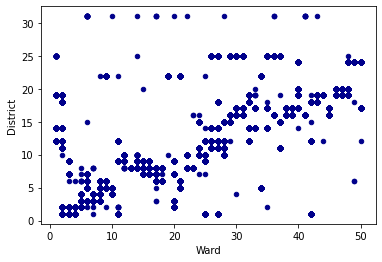

In [ ]:
# Scatter plot displaying the wards impacted with the respective District
s = merge_df.plot.scatter(x='Ward',y='District',c='DarkBlue')

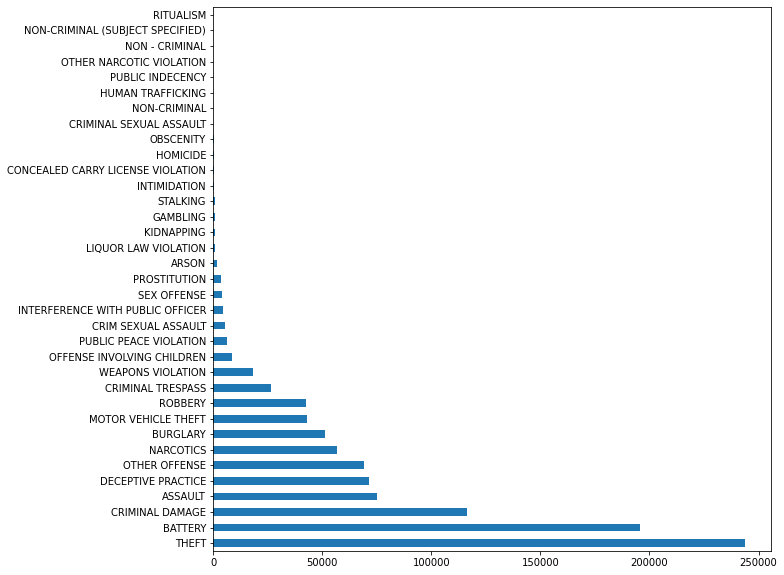

In [ ]:
# Bar graph with the list of crimes and counts
merge_df['Primary Type'].value_counts().plot.barh(x='Crimes', y='Count', figsize=(10, 10))

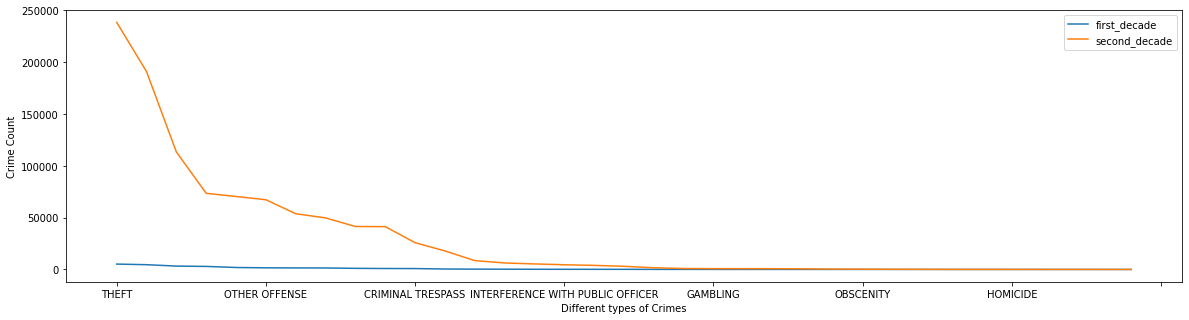

In [15]:
#Comparison of crimes between first decade(2001 - 2010) and second decade(2011 - 2020)
# First decade seems to be peaceful with as low as 28000 crimes while the second decade has contributed over 1 million crimes
fig, ax = plt.subplots(figsize=(20,5))
first_half = merge_df[(merge_df.Year >= 2001) & (merge_df.Year <= 2010)]
second_half = merge_df[(merge_df.Year >= 2011) & (merge_df.Year <= 2020)]
first_decade = first_half['Primary Type'].value_counts()
second_decade = second_half['Primary Type'].value_counts()
ax = first_decade.plot()
plt.xlabel('Different types of Crimes')
plt.ylabel("Crime Count")
second_decade.plot()
ax.legend(["first_decade", "second_decade"])

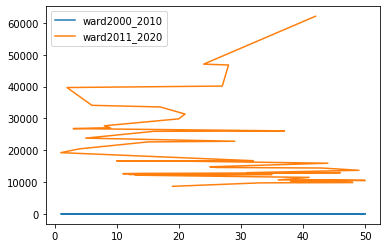

In [ ]:
#Comparison of Ward wise crimes - first decade V second decade 
ward2000_2010 = first_half['Ward'].value_counts()
ward2011_2020 = second_half['Ward'].value_counts()
ax = ward2000_2010.plot()

ward2011_2020.plot(ax=ax)
ax.legend(["ward2000_2010", "ward2011_2020"])

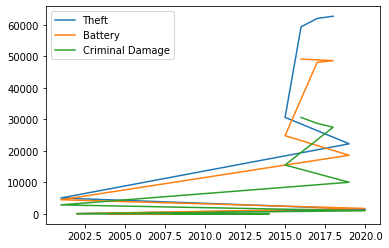

In [ ]:
#Comparison of Theft, Battery and criminal Damage(Major contributors) with respect to the year of crime
#Year 2015 - 2020 was the most vulnerable 
Theft = merge_df.loc[merge_df['Primary Type'].isin(['THEFT'])]
Battery = merge_df.loc[merge_df['Primary Type'].isin(['BATTERY'])]
Criminal_Damage = merge_df.loc[merge_df['Primary Type'].isin(['CRIMINAL DAMAGE'])]
t = Theft['Year'].value_counts()
ax = t.plot()
b = Battery['Year'].value_counts()
c = Criminal_Damage['Year'].value_counts()
b.plot()
c.plot()
ax.legend(["Theft", "Battery", "Criminal Damage"])
#ward2011_2020 = second_half['Ward'].value_counts()

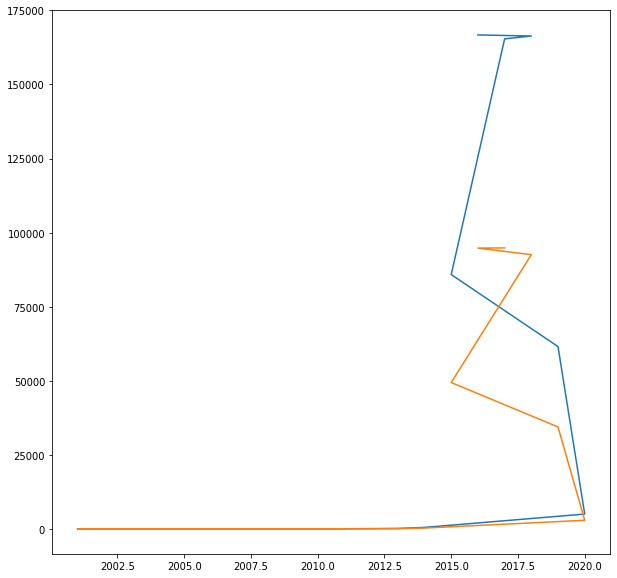

In [ ]:
#Impacted wards - Major V Minor
fig, ax = plt.subplots(figsize=(10,10))
major_wards = merge_df[(merge_df.Ward >= 15.) & (merge_df.Ward <= 45.)]
minor_wards = merge_df.loc[merge_df['Ward'].isin([12.,3.,11.,8.,6.,9.,1.,2.,14.,13.,4.,5.,10.,7.,50.,49.,46.,47.,48.,])]
mw = major_wards['Year'].value_counts()
ax=mw.plot()
mn_w = minor_wards['Year'].value_counts()
mn_w.plot()

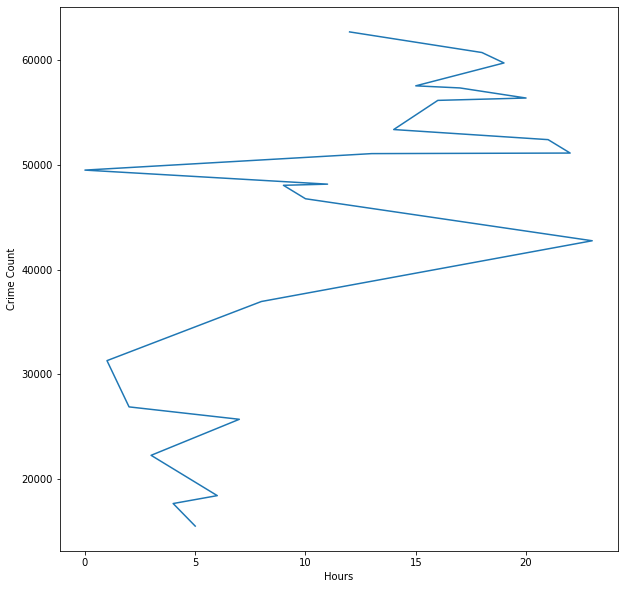

In [ ]:
# Below chart displays the crimes during the hour of the day
# 5 am is the safest time in a day. Most of the crimes happen after 12pm 
fig, ax = plt.subplots(figsize=(10,10))
Hourly_crime = merge_df['Hours'].value_counts()
plt.xlabel('Hours')
plt.ylabel("Crime Count")
ax = Hourly_crime.plot()

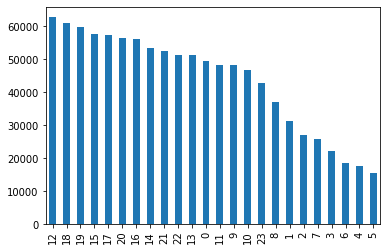

In [ ]:
# Hourly crime rate using bar chart
# 12 in the noon has more number of crimes and 1 to 8 am has the least number of crimes registered
merge_df['Hours'].value_counts().plot(kind='bar')

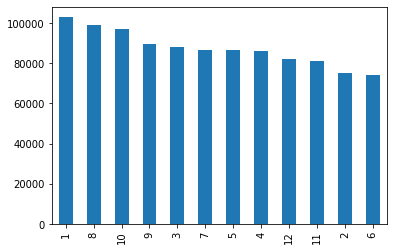

In [ ]:
# Monthly view of the crimes
# June is the safest month while Jan has contributed a hundred thousand crimes
merge_df['month'].value_counts().plot(kind='bar')

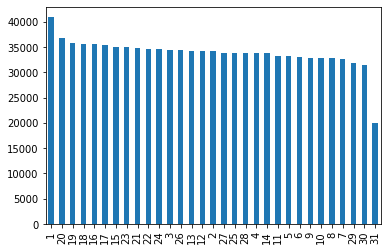

In [ ]:
# Daywise crimes
# 1st day of the month has topped the list and day 15 to 24 is the most vulnerable with ample of crime activities
merge_df['day'].value_counts().plot(kind='bar')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


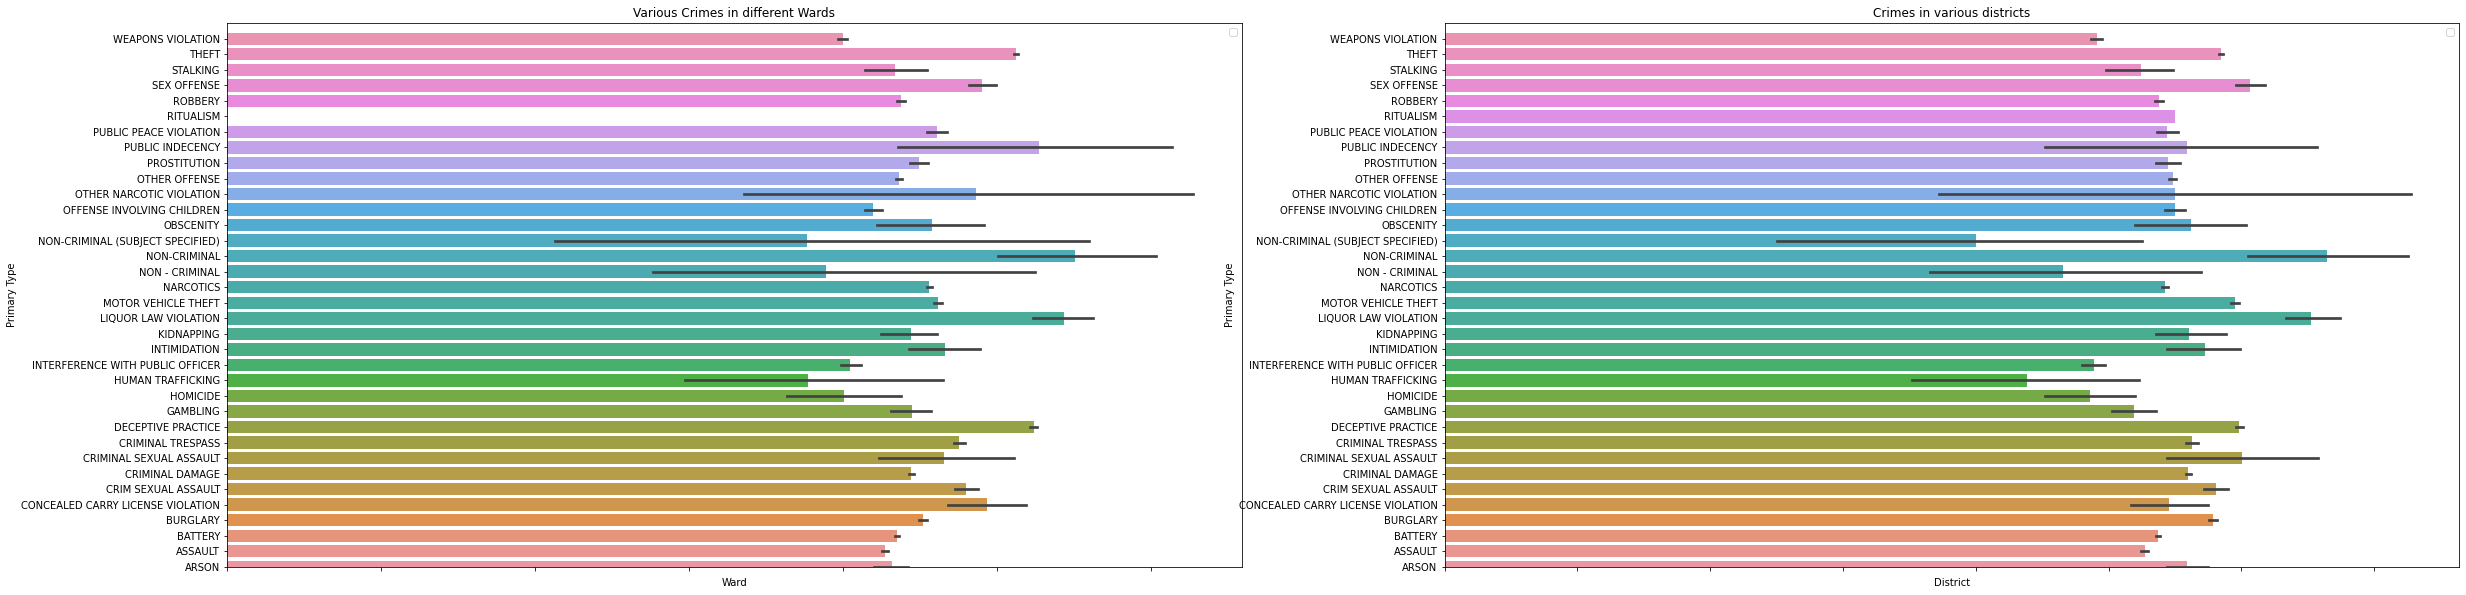

In [ ]:
fig, axis = plt.subplots(1, 2,figsize = (40, 10))
axis = axis.flatten()

sns.barplot(x = 'Ward', y = 'Primary Type', data = merge_df, ax = axis[0])
axis[0].legend(ncol = 2)

axis[0].set_ylim(0, 35)
axis[0].set_title('Various Crimes in different Wards')


axis[0].set_xticklabels(labels = axis[0].get_xticklabels(), rotation = 10)

sns.barplot(x = 'District', y = 'Primary Type', data = merge_df, ax = axis[1])
axis[1].legend(ncol = 2)
plt.ylim(0, 40)
axis[1].legend(ncol = 2)
axis[1].set_ylim(0, 35)
axis[1].set_title('Crimes in various districts')
axis[1].set_xticklabels(labels = axis[1].get_xticklabels(), rotation = 20);

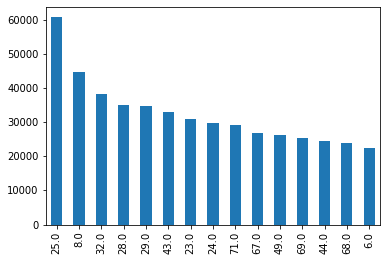

In [ ]:
merge_df['Community Area Number'].value_counts()[:6].plot(kind='bar')

In [ ]:
merge_df.set_index("Year", inplace = True)

In [ ]:
# Displays the max value of per capita income
merge_df['PER CAPITA INCOME '].unique().max()

88669

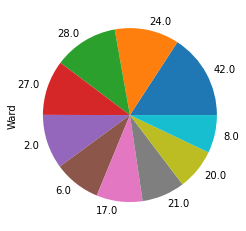

In [ ]:
# Displays the top 10 wards with most number of crimes
#fig, ax = plt.subplots(figsize=(25,15))
merge_df['Ward'].value_counts()[:8].plot(kind='pie')

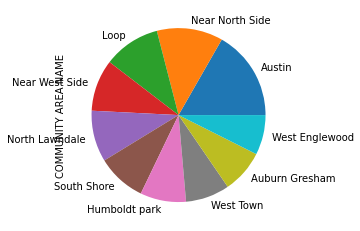

In [ ]:
# Major crimes and the top 10 areas impacted
merge_df['COMMUNITY AREA NAME'].value_counts()[:10].plot(kind='pie')

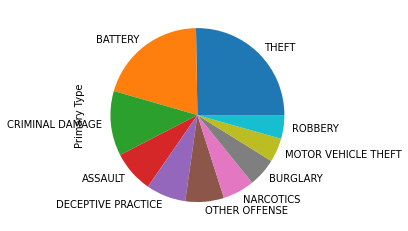

In [ ]:
merge_df['Primary Type'].value_counts()[:10].plot(kind='pie')

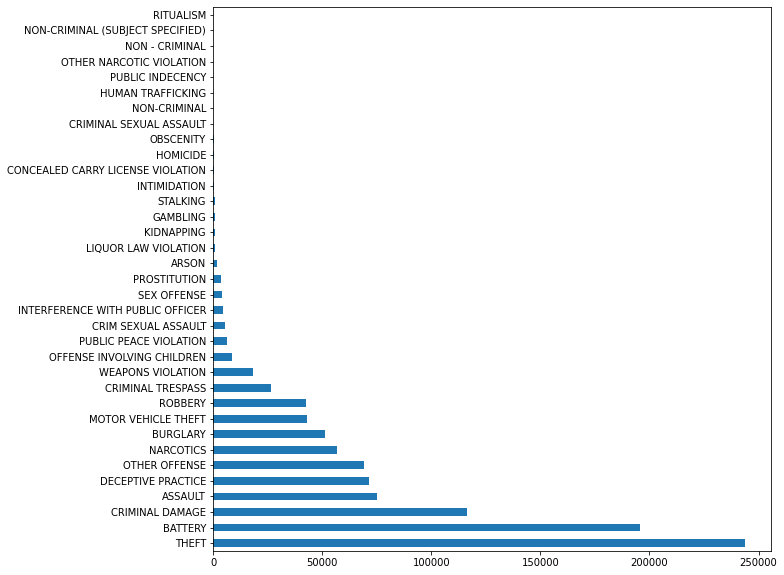

In [ ]:
merge_df['Primary Type'].value_counts().plot.barh(x='Crimes', y='Count', figsize=(10, 10))

In [ ]:
merge_df['District'].unique()

array([ 9., 31., 15., 25., 11., 12., 19.,  6.,  4., 14., 17., 16., 22.,
       10.,  8.,  5.,  3.,  2.,  7.,  1., 18., 20., 24., nan])

In [ ]:
# Top crikmes and the wards impacted
merge_df.groupby('Primary Type')['Ward'].count().nlargest(15)

Primary Type
THEFT                         238458
BATTERY                       190949
CRIMINAL DAMAGE               113373
ASSAULT                        73483
DECEPTIVE PRACTICE             70561
OTHER OFFENSE                  67291
NARCOTICS                      53782
BURGLARY                       49749
MOTOR VEHICLE THEFT            41462
ROBBERY                        41325
CRIMINAL TRESPASS              25806
WEAPONS VIOLATION              17866
OFFENSE INVOLVING CHILDREN      8624
PUBLIC PEACE VIOLATION          6255
CRIM SEXUAL ASSAULT             5367
Name: Ward, dtype: int64

In [ ]:
merge_df.groupby('year')['Primary Type'].count()

year
2001     25951
2002       549
2003        15
2004         7
2005        28
2006        27
2007        30
2008        56
2009        78
2010       144
2011       176
2012       260
2013       380
2014       919
2015    135299
2016    261485
2017    260210
2018    258899
2019     96021
2020      8041
Name: Primary Type, dtype: int64

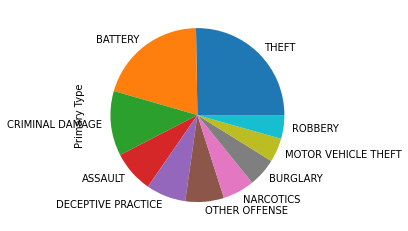

In [ ]:
merge_df['Primary Type'].value_counts()[:10].plot(kind='pie')

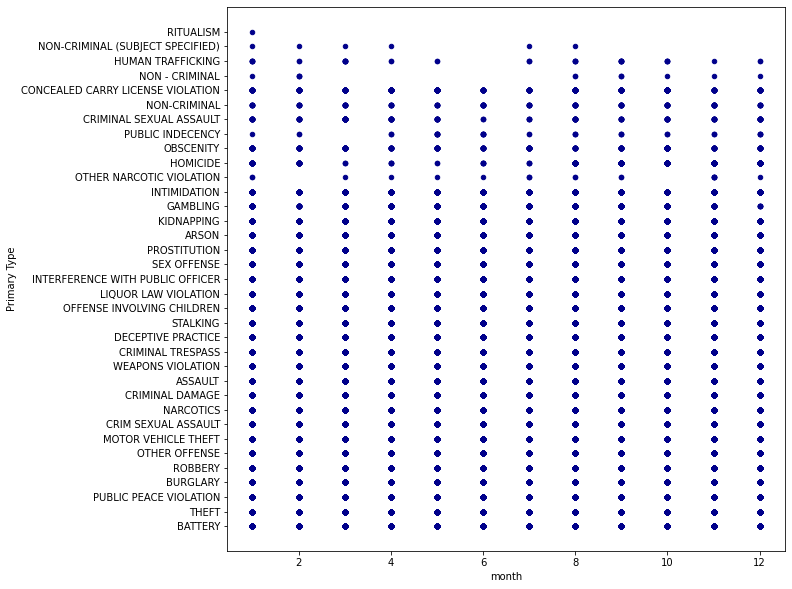

In [ ]:
# Scatter plot displaying the different crimes and the month when the crimes happened
merge_df.plot.scatter(x='month',y='Primary Type',c='DarkBlue',figsize=(10, 10))

In [ ]:
# Crimes from the year 2010 to 2020
second_half

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area Number,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PER CAPITA INCOME,day,month,year,Hours,Minutes
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,2018-02-10 15:50:00,41.815117,-87.670000,"(41.815117282, -87.669999562)",New City,11.9,29.0,23.0,41.5,12765,5,9,2015,13,30
10224832,HY411712,2015-09-04 17:00:00,013XX W 50TH ST,820,THEFT,$500 AND UNDER,RESIDENCE,False,True,933,9.0,16.0,61.0,6,1168281.0,1871609.0,2015,2018-02-10 15:50:00,41.803227,-87.658360,"(41.803227125, -87.658359911)",New City,11.9,29.0,23.0,41.5,12765,4,9,2015,17,0
10224834,HY411767,2015-09-05 14:00:00,051XX S PAULINA ST,820,THEFT,$500 AND UNDER,STREET,False,False,932,9.0,16.0,61.0,6,1165878.0,1870680.0,2015,2018-02-10 15:50:00,41.800729,-87.667199,"(41.800729285, -87.667199258)",New City,11.9,29.0,23.0,41.5,12765,5,9,2015,14,0
10224945,HY411865,2015-09-05 17:40:00,053XX S LAFLIN ST,2851,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE PORCH/HALLWAY,True,True,934,9.0,16.0,61.0,26,1167243.0,1869302.0,2015,2018-02-10 15:50:00,41.796919,-87.662233,"(41.796918756, -87.662232804)",New City,11.9,29.0,23.0,41.5,12765,5,9,2015,17,40
10224948,HY411788,2015-09-05 12:20:00,051XX S HONORE ST,620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,932,9.0,16.0,61.0,5,1164884.0,1870635.0,2015,2018-02-10 15:50:00,41.800627,-87.670846,"(41.800626881, -87.670845863)",New City,11.9,29.0,23.0,41.5,12765,5,9,2015,12,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11681553,JC255562,2019-05-08 21:55:00,132XX S BUFFALO AVE,584,STALKING,VIOLATION OF STALKING NO CONTACT ORDER,RESIDENCE,False,True,433,4.0,10.0,55.0,26,1200090.0,1817777.0,2019,2019-05-15 16:22:00,41.654763,-87.543515,"(41.654763305, -87.543514983)",Hegewisch,3.3,17.1,9.6,19.2,22677,8,5,2019,21,55
11681772,JC256500,2019-05-08 08:30:00,132XX S BURLEY AVE,560,ASSAULT,SIMPLE,"SCHOOL, PUBLIC, BUILDING",False,False,433,4.0,10.0,55.0,08A,1199760.0,1817775.0,2019,2019-05-15 16:22:00,41.654766,-87.544722,"(41.654766107, -87.544722501)",Hegewisch,3.3,17.1,9.6,19.2,22677,8,5,2019,8,30
11681795,JC256546,2019-05-09 10:30:00,035XX E 118TH ST,810,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),False,False,433,4.0,10.0,55.0,6,1201414.0,1827331.0,2019,2019-05-16 16:08:00,41.680947,-87.538348,"(41.680947073, -87.538348068)",Hegewisch,3.3,17.1,9.6,19.2,22677,9,5,2019,10,30


In [ ]:
year_2005 = merge_df[merge_df.index == 2005]
year_2015 = merge_df[merge_df.index == 2015]

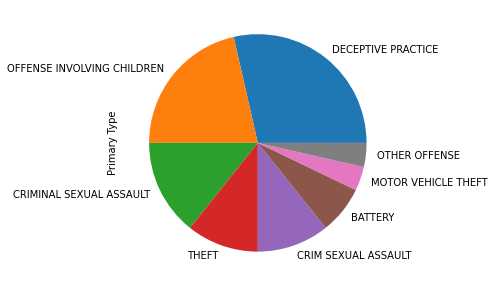

In [ ]:
# Top 10 Crimes happened during the year 2005
fig, ax = plt.subplots(figsize=(5,5))
year_2005['Primary Type'].value_counts()[:10].plot(kind='pie')

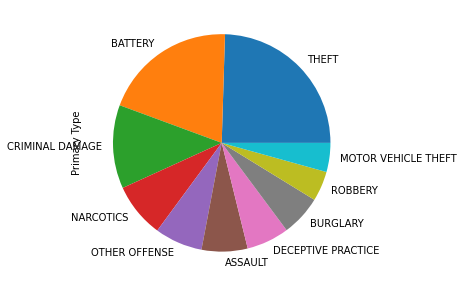

In [ ]:
# Top 10 crimes and their count during the year 2015
fig, ax = plt.subplots(figsize=(5,5))
year_2015['Primary Type'].value_counts()[:10].plot(kind='pie')


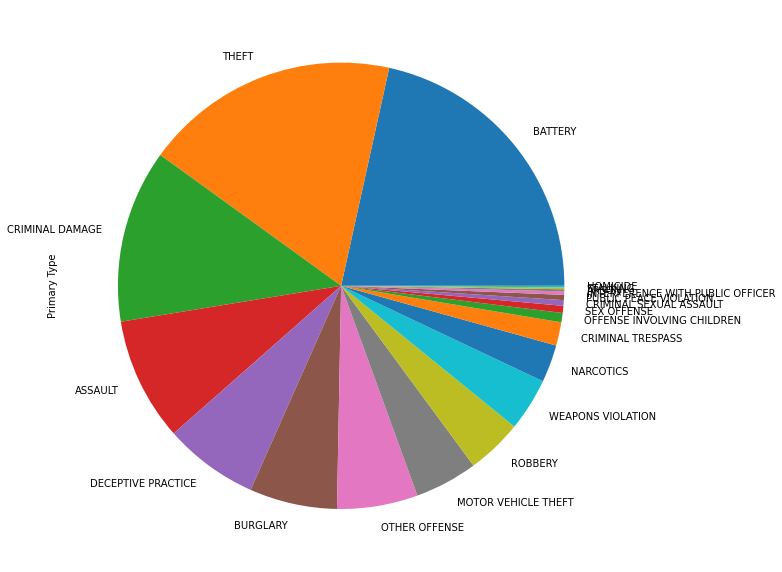

In [ ]:
fig, ax = plt.subplots(figsize=(10,15))
lastyear['Primary Type'].value_counts()[:20].plot(kind='pie')

In [ ]:
merge_df.groupby('Primary Type')['Location Description'].head()

Year
2015                          RESIDENCE
2015                          RESIDENCE
2015                             STREET
2015            RESIDENCE PORCH/HALLWAY
2015                          APARTMENT
                     ...               
2015    POLICE FACILITY/VEH PARKING LOT
2017                          RESIDENCE
2018                          APARTMENT
2017    POLICE FACILITY/VEH PARKING LOT
2001                           SIDEWALK
Name: Location Description, Length: 171, dtype: category
Categories (163, object): ['ABANDONED BUILDING', 'AIRCRAFT',
                           'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA', 'AIRPORT BUILDING NON-TERMINAL - SECURE AREA', ...,
                           'VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS', 'VEHICLE-COMMERCIAL - TROLLEY BUS', 'WAREHOUSE', 'YARD']

In [ ]:

merge_df.groupby('Primary Type').mean().head()

,Arrest,Domestic,Beat,District,Ward,Community Area Number,X Coordinate,Y Coordinate,Latitude,Longitude,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PER CAPITA INCOME,day,month,year,Hours,Minutes
Primary Type,,,,,,,,,,,,,,,,,,,,
ARSON,0.102837,0.052009,1143.887116,11.182624,21.573341,40.810712,1.162131e+06,1.881420e+06,41.830266,-87.680692,6.438771,25.856619,18.114953,25.366962,20222.423168,15.952128,6.521868,2016.340426,10.608747,27.075059
ASSAULT,0.184912,0.256481,1078.602436,10.544717,21.356504,39.710252,1.165596e+06,1.881584e+06,41.830641,-87.667971,5.396787,25.824385,17.880461,21.432758,23530.271091,15.779730,6.430599,2016.718689,13.560154,23.164979
BATTERY,0.210078,0.492798,1099.866681,10.751339,21.752536,39.146334,1.165211e+06,1.882461e+06,41.833057,-87.669359,5.495210,26.176507,18.001375,21.625479,23364.137028,15.824462,6.451818,2016.585434,12.758859,23.436105
BURGLARY,0.049159,0.011923,1180.972635,11.573925,22.603610,38.284247,1.164568e+06,1.884894e+06,41.839745,-87.671650,5.152625,23.163640,16.243548,20.742584,25289.682056,15.958815,6.699648,2016.374941,12.016224,14.734324
CONCEALED CARRY LICENSE VIOLATION,0.962209,0.000000,1117.906977,10.909884,24.683140,53.337209,1.149758e+06,1.884679e+06,41.839425,-87.726076,4.414244,23.134012,16.820349,19.518605,22519.741279,15.784884,6.520349,2017.691860,12.886628,26.680233


In [ ]:
merge_df.groupby(['Primary Type', 'COMMUNITY AREA NAME']).agg({'Community Area Number':['mean', 'std'], 'Beat':['min', 'max']})

Community Area Number  ...    Beat
                                                       mean  ...     max
Primary Type      COMMUNITY AREA NAME                        ...        
ARSON             Albany Park                          14.0  ...  1723.0
                  Archer Heights                       57.0  ...   815.0
                  Armour Square                        34.0  ...   914.0
                  Ashburn                              70.0  ...   835.0
                  Auburn Gresham                       71.0  ...  2223.0
...                                                     ...  ...     ...
WEAPONS VIOLATION West Lawn                            65.0  ...   833.0
                  West Pullman                         53.0  ...   532.0
                  West Ridge                            2.0  ...  2433.0
                  West Town                            24.0  ...  1434.0
                  Woodlawn                             42.0  ...   331.0

[2730 rows x 4 columns]

In [ ]:
merge_df['Primary Type'].unique()

['BATTERY', 'THEFT', 'PUBLIC PEACE VIOLATION', 'BURGLARY', 'ROBBERY', ..., 'CONCEALED CARRY LICENSE VIOLATION', 'NON - CRIMINAL', 'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'RITUALISM']
Length: 35
Categories (35, object): ['BATTERY', 'THEFT', 'PUBLIC PEACE VIOLATION', 'BURGLARY', ...,
                          'NON - CRIMINAL', 'HUMAN TRAFFICKING',
                          'NON-CRIMINAL (SUBJECT SPECIFIED)', 'RITUALISM']

In [ ]:
merge_df.nunique()

Case Number                                     1048562
Date                                             473579
Block                                             42190
IUCR                                                361
Primary Type                                         35
Description                                         433
Location Description                                163
Arrest                                                2
Domestic                                              2
Beat                                                302
District                                             23
Ward                                                 50
Community Area Number                                77
FBI Code                                             26
X Coordinate                                      66203
Y Coordinate                                     108022
Updated On                                         2137
Latitude                                        

In [ ]:
merge_df['COMMUNITY AREA NAME'].value_counts()

Austin             60596
Near North Side    44529
Loop               38242
Near West Side     34846
North Lawndale     34558
                   ...  
Hegewisch           2296
Mount Greenwood     2169
Forest Glen         2010
Burnside            1484
Edison Park         1032
Name: COMMUNITY AREA NAME, Length: 78, dtype: int64

In [ ]:
merge_df[merge_df.Description == 'UNLAWFUL ENTRY']

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area Number,FBI Code,X Coordinate,Y Coordinate,Updated On,Latitude,Longitude,Location,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PER CAPITA INCOME,day,month,year,Hours,Minutes
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,HY411788,2015-09-05 12:20:00,051XX S HONORE ST,620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,932,9.0,16.0,61.0,5,1164884.0,1870635.0,2018-02-10 15:50:00,41.800627,-87.670846,"(41.800626881, -87.670845863)",New City,11.9,29.0,23.0,41.5,12765,5,9,2015,12,20
2015,HY413176,2015-09-05 18:00:00,006XX W 47TH ST,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,925,9.0,11.0,61.0,5,1172831.0,1873725.0,2018-02-10 15:50:00,41.808934,-87.641610,"(41.808934381, -87.641610504)",New City,11.9,29.0,23.0,41.5,12765,5,9,2015,18,0
2015,HY426802,2015-09-17 10:00:00,007XX W 49TH PL,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,935,9.0,3.0,61.0,5,1172163.0,1872044.0,2018-02-10 15:50:00,41.804336,-87.644110,"(41.804336273, -87.644110028)",New City,11.9,29.0,23.0,41.5,12765,17,9,2015,10,0
2015,HY428630,2015-09-18 00:30:00,010XX W 48TH ST,620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,933,9.0,3.0,61.0,5,1170141.0,1872982.0,2018-02-10 15:50:00,41.806954,-87.651498,"(41.8069545, -87.651498476)",New City,11.9,29.0,23.0,41.5,12765,18,9,2015,0,30
2015,HY437004,2015-09-24 07:30:00,021XX W 51ST ST,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,932,9.0,16.0,61.0,5,1163065.0,1870828.0,2018-02-10 15:50:00,41.801195,-87.677511,"(41.801194774, -87.677511345)",New City,11.9,29.0,23.0,41.5,12765,24,9,2015,7,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,JB468548,2018-10-09 10:30:00,132XX S BRANDON AVE,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,433,4.0,10.0,55.0,5,1199436.0,1817705.0,2018-10-16 16:10:00,41.654582,-87.545910,"(41.654582147, -87.545910339)",Hegewisch,3.3,17.1,9.6,19.2,22677,9,10,2018,10,30
2018,JB474122,2018-10-10 19:00:00,132XX S COMMERCIAL AVE,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,433,4.0,10.0,55.0,5,1198105.0,1817717.0,2018-10-17 16:24:00,41.654648,-87.550780,"(41.654648338, -87.550779986)",Hegewisch,3.3,17.1,9.6,19.2,22677,10,10,2018,19,0
2018,JB498856,2018-10-22 10:00:00,131XX S BRANDON AVE,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,433,4.0,10.0,55.0,5,1199431.0,1818364.0,2018-11-04 16:06:00,41.656391,-87.545907,"(41.656390644, -87.545906607)",Hegewisch,3.3,17.1,9.6,19.2,22677,22,10,2018,10,0


In [ ]:
merge_df.groupby('Primary Type').get_group('BURGLARY')

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area Number,FBI Code,X Coordinate,Y Coordinate,Updated On,Latitude,Longitude,Location,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PER CAPITA INCOME,day,month,year,Hours,Minutes
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,HY411788,2015-09-05 12:20:00,051XX S HONORE ST,620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,932,9.0,16.0,61.0,5,1164884.0,1870635.0,2018-02-10 15:50:00,41.800627,-87.670846,"(41.800626881, -87.670845863)",New City,11.9,29.0,23.0,41.5,12765,5,9,2015,12,20
2015,HY413176,2015-09-05 18:00:00,006XX W 47TH ST,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,925,9.0,11.0,61.0,5,1172831.0,1873725.0,2018-02-10 15:50:00,41.808934,-87.641610,"(41.808934381, -87.641610504)",New City,11.9,29.0,23.0,41.5,12765,5,9,2015,18,0
2015,HY414373,2015-09-07 17:10:00,021XX W 47TH ST,610,BURGLARY,FORCIBLE ENTRY,OTHER RAILROAD PROP / TRAIN DEPOT,True,False,924,9.0,12.0,61.0,5,1162893.0,1873482.0,2018-02-10 15:50:00,41.808481,-87.678068,"(41.808481274, -87.678067928)",New City,11.9,29.0,23.0,41.5,12765,7,9,2015,17,10
2015,HY423223,2015-09-14 14:30:00,050XX S WOOD ST,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,931,9.0,16.0,61.0,5,1165199.0,1871257.0,2018-02-10 15:50:00,41.802327,-87.669673,"(41.802327055, -87.669673041)",New City,11.9,29.0,23.0,41.5,12765,14,9,2015,14,30
2015,HY423481,2015-09-14 15:00:00,051XX S WOOD ST,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,932,9.0,16.0,61.0,5,1165218.0,1870560.0,2018-02-10 15:50:00,41.800414,-87.669623,"(41.800414001, -87.669623098)",New City,11.9,29.0,23.0,41.5,12765,14,9,2015,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,JB560231,2018-12-19 08:00:00,130XX S CARONDOLET AVE,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE-GARAGE,False,False,433,4.0,10.0,55.0,5,1198430.0,1819059.0,2018-12-26 16:22:00,41.658323,-87.549546,"(41.658322838, -87.549546181)",Hegewisch,3.3,17.1,9.6,19.2,22677,19,12,2018,8,0
2018,JB560571,2018-12-20 01:22:00,129XX S EXCHANGE AVE,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,433,4.0,10.0,55.0,5,1197757.0,1819863.0,2018-12-27 16:09:00,41.660546,-87.551982,"(41.660545875, -87.55198212)",Hegewisch,3.3,17.1,9.6,19.2,22677,20,12,2018,1,22
2019,JC202326,2019-03-27 17:00:00,133XX S COMMERCIAL AVE,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,433,4.0,10.0,55.0,5,1198108.0,1817157.0,2019-04-03 16:12:00,41.653112,-87.550788,"(41.653111557, -87.55078761)",Hegewisch,3.3,17.1,9.6,19.2,22677,27,3,2019,17,0


In [ ]:
merge_df['Location Description']=='RESIDENCE'

Year
2015     True
2015     True
2015    False
2015    False
2015    False
        ...  
2019     True
2019    False
2019    False
2019    False
2019    False
Name: Location Description, Length: 1048575, dtype: bool

In [ ]:
merge_df[merge_df['Location Description']=='RESIDENCE']

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area Number,FBI Code,X Coordinate,Y Coordinate,Updated On,Latitude,Longitude,Location,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PER CAPITA INCOME,day,month,year,Hours,Minutes
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2018-02-10 15:50:00,41.815117,-87.670000,"(41.815117282, -87.669999562)",New City,11.9,29.0,23.0,41.5,12765,5,9,2015,13,30
2015,HY411712,2015-09-04 17:00:00,013XX W 50TH ST,820,THEFT,$500 AND UNDER,RESIDENCE,False,True,933,9.0,16.0,61.0,6,1168281.0,1871609.0,2018-02-10 15:50:00,41.803227,-87.658360,"(41.803227125, -87.658359911)",New City,11.9,29.0,23.0,41.5,12765,4,9,2015,17,0
2015,HY413454,2015-09-07 00:30:00,054XX S WINCHESTER AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,False,932,9.0,16.0,61.0,08B,1164281.0,1868595.0,2018-02-10 15:50:00,41.795042,-87.673115,"(41.795041602, -87.673114725)",New City,11.9,29.0,23.0,41.5,12765,7,9,2015,0,30
2015,HY414138,2015-09-07 11:00:00,047XX S LAFLIN ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,933,9.0,20.0,61.0,08B,1167135.0,1873303.0,2018-02-10 15:50:00,41.807900,-87.662514,"(41.807900272, -87.662514344)",New City,11.9,29.0,23.0,41.5,12765,7,9,2015,11,0
2015,HY414619,2015-09-07 22:46:00,048XX S WINCHESTER AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,RESIDENCE,True,False,931,9.0,20.0,61.0,15,1164171.0,1872515.0,2018-02-10 15:50:00,41.805801,-87.673408,"(41.805800877, -87.673407736)",New City,11.9,29.0,23.0,41.5,12765,7,9,2015,22,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,JC240324,2019-04-26 18:00:00,132XX S BUFFALO AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,433,4.0,10.0,55.0,14,1200090.0,1817777.0,2019-05-03 16:14:00,41.654763,-87.543515,"(41.654763305, -87.543514983)",Hegewisch,3.3,17.1,9.6,19.2,22677,26,4,2019,18,0
2019,JC239069,2019-04-20 10:00:00,133XX S BALTIMORE AVE,810,THEFT,OVER $500,RESIDENCE,False,False,433,4.0,10.0,55.0,6,1199102.0,1817037.0,2019-05-01 16:21:00,41.652757,-87.547155,"(41.652757444, -87.547154715)",Hegewisch,3.3,17.1,9.6,19.2,22677,20,4,2019,10,0
2019,JC244284,2019-04-30 14:30:00,132XX S AVENUE M,560,ASSAULT,SIMPLE,RESIDENCE,False,False,433,4.0,10.0,55.0,08A,1201743.0,1817805.0,2019-05-07 16:18:00,41.654798,-87.537466,"(41.654798419, -87.537465812)",Hegewisch,3.3,17.1,9.6,19.2,22677,30,4,2019,14,30


In [ ]:
merge_df.groupby('Primary Type').mean()

,Arrest,Domestic,Beat,District,Ward,Community Area Number,X Coordinate,Y Coordinate,Latitude,Longitude,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PER CAPITA INCOME,day,month,year,Hours,Minutes
Primary Type,,,,,,,,,,,,,,,,,,,,
ARSON,0.102837,0.052009,1143.887116,11.182624,21.573341,40.810712,1.162131e+06,1.881420e+06,41.830266,-87.680692,6.438771,25.856619,18.114953,25.366962,20222.423168,15.952128,6.521868,2016.340426,10.608747,27.075059
ASSAULT,0.184912,0.256481,1078.602436,10.544717,21.356504,39.710252,1.165596e+06,1.881584e+06,41.830641,-87.667971,5.396787,25.824385,17.880461,21.432758,23530.271091,15.779730,6.430599,2016.718689,13.560154,23.164979
BATTERY,0.210078,0.492798,1099.866681,10.751339,21.752536,39.146334,1.165211e+06,1.882461e+06,41.833057,-87.669359,5.495210,26.176507,18.001375,21.625479,23364.137028,15.824462,6.451818,2016.585434,12.758859,23.436105
BURGLARY,0.049159,0.011923,1180.972635,11.573925,22.603610,38.284247,1.164568e+06,1.884894e+06,41.839745,-87.671650,5.152625,23.163640,16.243548,20.742584,25289.682056,15.958815,6.699648,2016.374941,12.016224,14.734324
CONCEALED CARRY LICENSE VIOLATION,0.962209,0.000000,1117.906977,10.909884,24.683140,53.337209,1.149758e+06,1.884679e+06,41.839425,-87.726076,4.414244,23.134012,16.820349,19.518605,22519.741279,15.784884,6.520349,2017.691860,12.886628,26.680233
CRIM SEXUAL ASSAULT,0.090326,0.166911,1184.819531,11.614328,24.005403,35.201043,1.165365e+06,1.888106e+06,41.848545,-87.668624,5.180158,24.261414,16.237889,19.755973,28075.286918,14.814401,6.443569,2016.426896,10.310553,12.075302
CRIMINAL DAMAGE,0.059005,0.112033,1144.456234,11.200949,22.211938,38.589889,1.164524e+06,1.883947e+06,41.837149,-87.671835,5.326440,24.305783,16.862490,21.188241,24517.401589,15.865366,6.533429,2016.503758,12.964310,17.362571
CRIMINAL SEXUAL ASSAULT,0.074534,0.229814,1225.583851,12.006211,23.260870,35.360248,1.165726e+06,1.889370e+06,41.852007,-87.667266,4.855280,22.572050,15.867081,19.111801,27993.068323,14.677019,6.161491,2017.341615,10.111801,10.937888
CRIMINAL TRESPASS,0.595783,0.048323,1154.698544,11.260524,23.767767,36.419848,1.164959e+06,1.888198e+06,41.848802,-87.670118,4.713792,23.720027,15.818380,18.336077,29128.369138,15.800593,6.304157,2016.493697,13.452540,23.978615


In [ ]:
print('check_final_df',(merge_df.shape))

check_final_df (1048575, 31)


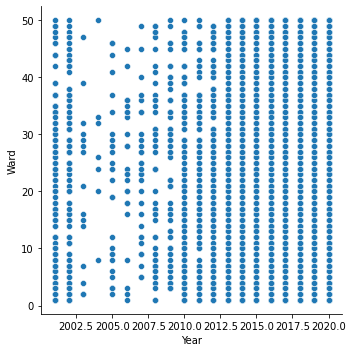

In [ ]:
sns.relplot(x='Year',y='Ward',data=df2)

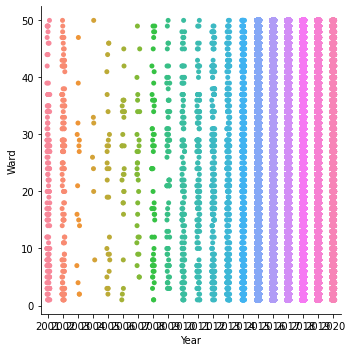

In [ ]:
sns.catplot(x='Year',y='Ward',data=df2)

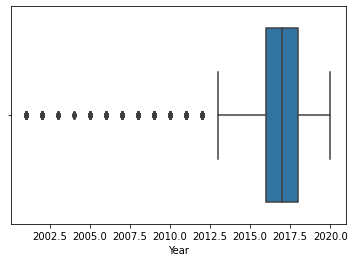

In [ ]:
sns.boxplot(x='Year',data=df2)

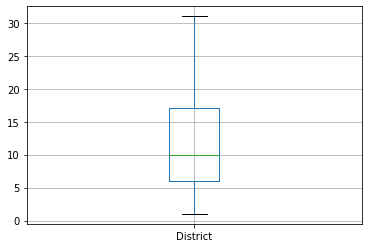

In [ ]:
df2_boxplot = df2.boxplot('District')
df2_boxplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d4c219910>]],
      dtype=object)

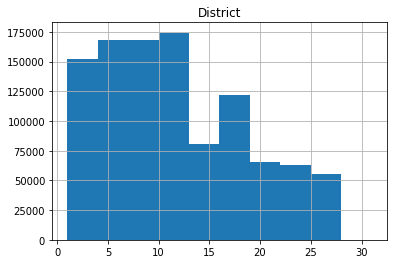

In [ ]:
df2.hist('District')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1048575 non-null  int64  
 1   Case Number            1048575 non-null  object 
 2   Date                   1048575 non-null  object 
 3   Block                  1048575 non-null  object 
 4   IUCR                   1048575 non-null  object 
 5   Primary Type           1048575 non-null  object 
 6   Description            1048575 non-null  object 
 7   Location Description   1045453 non-null  object 
 8   Arrest                 1048575 non-null  bool   
 9   Domestic               1048575 non-null  bool   
 10  Beat                   1048575 non-null  int64  
 11  District               1048574 non-null  float64
 12  Ward                   1022393 non-null  float64
 13  Community Area Number  1022505 non-null  float64
 14  FBI Code          

In [ ]:
df2[df2.District > 18]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area Number,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
18,10224757,HY411388,9/5/2015 9:55,088XX S PAULINA ST,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,2221,22.0,21.0,71.0,5,1166554.0,1846067.0,2015,2/10/2018 15:50,41.733174,-87.665421,"(41.733173536, -87.665421067)"
38,10224781,HY411499,9/5/2015 11:20,026XX W HOLLYWOOD AVE,320,ROBBERY,STRONGARM - NO WEAPON,STREET,False,False,2011,20.0,40.0,2.0,3,1157555.0,1937753.0,2015,2/10/2018 15:50,41.984957,-87.695895,"(41.984956576, -87.69589518)"
40,10224783,HY411679,9/5/2015 14:40,041XX W CRYSTAL ST,141C,WEAPONS VIOLATION,UNLAWFUL USE OTHER DANG WEAPON,SIDEWALK,True,False,2534,25.0,37.0,23.0,15,1148654.0,1908016.0,2015,2/10/2018 15:50,41.903533,-87.729403,"(41.903532921, -87.729402988)"
51,10224797,HY411683,9/5/2015 14:00,012XX W WILSON AVE,1330,CRIMINAL TRESPASS,TO LAND,RESTAURANT,False,False,1913,19.0,46.0,3.0,26,1167243.0,1930683.0,2015,2/10/2018 15:50,41.965353,-87.660468,"(41.965352898, -87.66046802)"
52,10224800,HY411723,9/5/2015 14:30,037XX N BROADWAY,910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1925,19.0,46.0,6.0,7,1170388.0,1925225.0,2015,2/10/2018 15:50,41.950308,-87.649065,"(41.950307614, -87.649064886)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048541,1317411,G009189,1/4/2001 18:00,004XX W ALDINE AV,910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,2331,19.0,NaN,NaN,7,1172422.0,1922351.0,2001,8/17/2015 15:03,41.942376,-87.641673,"(41.942376456, -87.641673401)"
1048542,1317412,G008172,1/2/2001 19:00,017XX N KOSTNER AV,820,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),False,False,2533,25.0,NaN,NaN,6,1146739.0,1911368.0,2001,8/17/2015 15:03,41.912768,-87.736352,"(41.912767935, -87.736351587)"
1048545,1317419,G004736,1/3/2001 9:00,053XX N WAYNE AV,460,BATTERY,SIMPLE,RESIDENCE,True,True,2013,20.0,NaN,NaN,08B,1166386.0,1935579.0,2001,8/17/2015 15:03,41.978806,-87.663478,"(41.978806112, -87.663478246)"
1048563,1317454,G007321,1/4/2001 13:05,041XX W CRYSTAL ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,True,2534,25.0,NaN,NaN,14,1148186.0,1907963.0,2001,8/17/2015 15:03,41.903397,-87.731123,"(41.903396512, -87.731123439)"


In [ ]:
# Defining the First year as 2001 from the dataset and the last year as 2020 as the dataset is till 2020
lastyear = merge_df[merge_df.year == 2020]
firstyear = merge_df[merge_df.year == 2001]

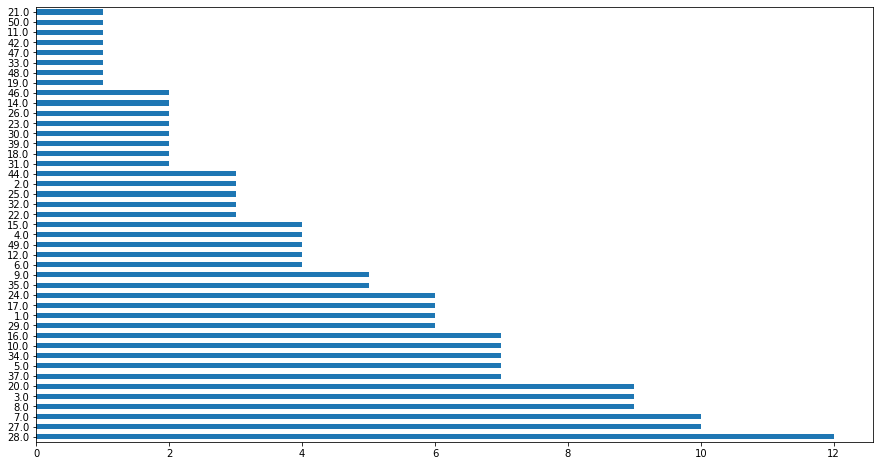

In [ ]:
# List of Crimes in the first year with respect to the ward
fig, ax = plt.subplots(figsize=(15,8))
crimes_2001 = firstyear['Ward'].value_counts().plot(kind="barh")

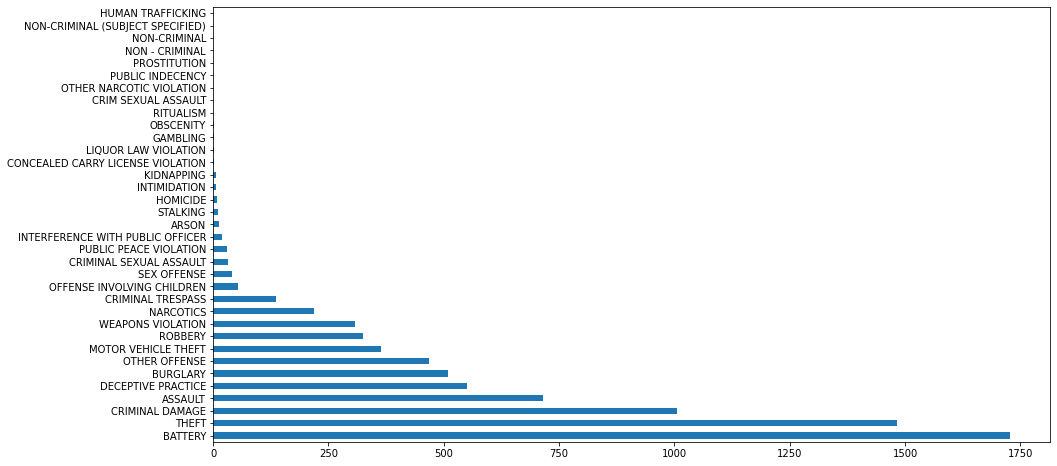

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
crimes_2020 = lastyear['Primary Type'].value_counts().plot(kind="barh")

In [ ]:
crimes_2001 = firstyear['Ward'].value_counts()
crimes_2020 = lastyear['Ward'].value_counts()

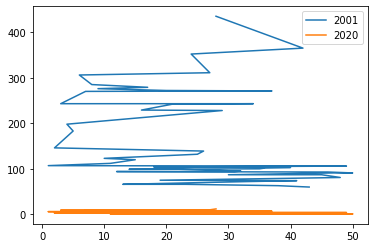

In [ ]:
#Comparison of the Crimes from the year 2001 and 2020 with respective wards
ax = crimes_2020.plot()
crimes_2001.plot(ax=ax)
ax.legend(["2001", "2020"])

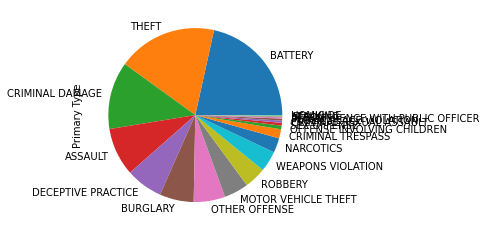

In [ ]:
lastyear['Primary Type'].value_counts()[:20].plot(kind='pie')

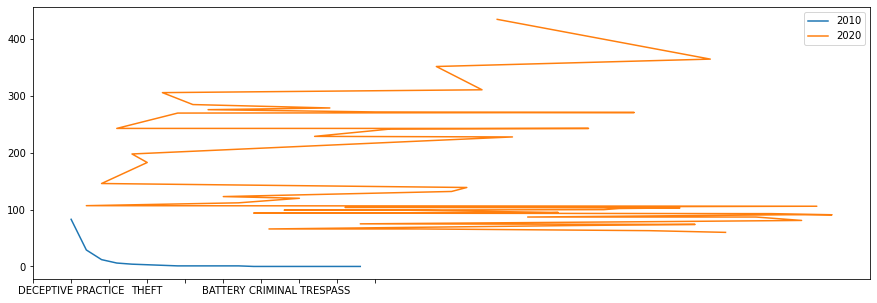

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
year_2010 = merge_df[merge_df.year == 2010]
Crimes_2010 = year_2010['Primary Type'].value_counts()[:20]
ax = Crimes_2010.plot()
crimes_2020.plot(ax=ax)
ax.legend(["2010", "2020"]);

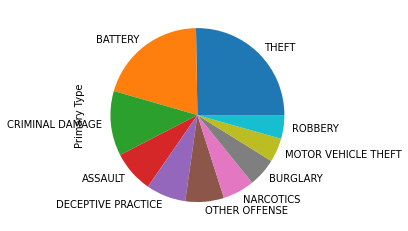

In [ ]:
merge_df['Primary Type'].value_counts()[:10].plot(kind='pie')

In [ ]:
merge_df.groupby('Primary Type').mean().head()

,Arrest,Domestic,Beat,District,Ward,Community Area Number,X Coordinate,Y Coordinate,Latitude,Longitude,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PER CAPITA INCOME,day,month,year,Hours,Minutes
Primary Type,,,,,,,,,,,,,,,,,,,,
ARSON,0.102837,0.052009,1143.887116,11.182624,21.573341,40.810712,1.162131e+06,1.881420e+06,41.830266,-87.680692,6.438771,25.856619,18.114953,25.366962,20222.423168,15.952128,6.521868,2016.340426,10.608747,27.075059
ASSAULT,0.184912,0.256481,1078.602436,10.544717,21.356504,39.710252,1.165596e+06,1.881584e+06,41.830641,-87.667971,5.396787,25.824385,17.880461,21.432758,23530.271091,15.779730,6.430599,2016.718689,13.560154,23.164979
BATTERY,0.210078,0.492798,1099.866681,10.751339,21.752536,39.146334,1.165211e+06,1.882461e+06,41.833057,-87.669359,5.495210,26.176507,18.001375,21.625479,23364.137028,15.824462,6.451818,2016.585434,12.758859,23.436105
BURGLARY,0.049159,0.011923,1180.972635,11.573925,22.603610,38.284247,1.164568e+06,1.884894e+06,41.839745,-87.671650,5.152625,23.163640,16.243548,20.742584,25289.682056,15.958815,6.699648,2016.374941,12.016224,14.734324
CONCEALED CARRY LICENSE VIOLATION,0.962209,0.000000,1117.906977,10.909884,24.683140,53.337209,1.149758e+06,1.884679e+06,41.839425,-87.726076,4.414244,23.134012,16.820349,19.518605,22519.741279,15.784884,6.520349,2017.691860,12.886628,26.680233


In [ ]:
merge_df.groupby(['Primary Type', 'COMMUNITY AREA NAME']).agg({'Community Area Number':['mean', 'std'], 'Beat':['min', 'max']})

Community Area Number  ...    Beat
                                                       mean  ...     max
Primary Type      COMMUNITY AREA NAME                        ...        
ARSON             Albany Park                          14.0  ...  1723.0
                  Archer Heights                       57.0  ...   815.0
                  Armour Square                        34.0  ...   914.0
                  Ashburn                              70.0  ...   835.0
                  Auburn Gresham                       71.0  ...  2223.0
...                                                     ...  ...     ...
WEAPONS VIOLATION West Lawn                            65.0  ...   833.0
                  West Pullman                         53.0  ...   532.0
                  West Ridge                            2.0  ...  2433.0
                  West Town                            24.0  ...  1434.0
                  Woodlawn                             42.0  ...   331.0

[2730 rows x 4 columns]

In [ ]:
merge_df['Primary Type'].unique()

['BATTERY', 'THEFT', 'PUBLIC PEACE VIOLATION', 'BURGLARY', 'ROBBERY', ..., 'CONCEALED CARRY LICENSE VIOLATION', 'NON - CRIMINAL', 'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'RITUALISM']
Length: 35
Categories (35, object): ['BATTERY', 'THEFT', 'PUBLIC PEACE VIOLATION', 'BURGLARY', ...,
                          'NON - CRIMINAL', 'HUMAN TRAFFICKING',
                          'NON-CRIMINAL (SUBJECT SPECIFIED)', 'RITUALISM']

In [ ]:
merge_df.nunique()

Case Number                                     1048562
Date                                             473579
Block                                             42190
IUCR                                                361
Primary Type                                         35
Description                                         433
Location Description                                163
Arrest                                                2
Domestic                                              2
Beat                                                302
District                                             23
Ward                                                 50
Community Area Number                                77
FBI Code                                             26
X Coordinate                                      66203
Y Coordinate                                     108022
Updated On                                         2137
Latitude                                        

In [ ]:
merge_df.count()

Case Number                                     1048575
Date                                            1048575
Block                                           1048575
IUCR                                            1048575
Primary Type                                    1048575
Description                                     1048575
Location Description                            1045453
Arrest                                          1048575
Domestic                                        1048575
Beat                                            1048575
District                                        1048574
Ward                                            1022393
Community Area Number                           1022505
FBI Code                                        1048575
X Coordinate                                    1043445
Y Coordinate                                    1043445
Updated On                                      1048575
Latitude                                        

In [ ]:
merge_df['COMMUNITY AREA NAME'].value_counts()

Austin             60596
Near North Side    44529
Loop               38242
Near West Side     34846
North Lawndale     34558
                   ...  
Hegewisch           2296
Mount Greenwood     2169
Forest Glen         2010
Burnside            1484
Edison Park         1032
Name: COMMUNITY AREA NAME, Length: 78, dtype: int64

In [ ]:
merge_df['Primary Type'].unique()

['BATTERY', 'THEFT', 'PUBLIC PEACE VIOLATION', 'BURGLARY', 'ROBBERY', ..., 'CONCEALED CARRY LICENSE VIOLATION', 'NON - CRIMINAL', 'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'RITUALISM']
Length: 35
Categories (35, object): ['BATTERY', 'THEFT', 'PUBLIC PEACE VIOLATION', 'BURGLARY', ...,
                          'NON - CRIMINAL', 'HUMAN TRAFFICKING',
                          'NON-CRIMINAL (SUBJECT SPECIFIED)', 'RITUALISM']

In [16]:
# Defining x and y parameters
x = merge_df['Primary Type']
y = merge_df['Beat']

In [17]:
# Reshaping the x and y axis
x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [18]:
# Splitting the test and train data with 20% test data and 80% train data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)
x_train

/usr/local/lib/python3.7/dist-packages/sklearn/utils/__init__.py:202: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return array[key] if axis == 0 else array[:, key]


array([[ 6],
       [ 2],
       [17],
       ...,
       [ 6],
       [ 8],
       [33]], dtype=int8)

In [19]:
print('check_data_split',[x_train.shape,x_test.shape,y_train.shape,y_test.shape])

check_data_split [(838860, 1), (209715, 1), (838860, 1), (209715, 1)]


In [ ]:
merge_df[merge_df.Description == 'UNLAWFUL ENTRY']

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area Number,FBI Code,X Coordinate,Y Coordinate,Updated On,Latitude,Longitude,Location,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PER CAPITA INCOME,day,month,year,Hours,Minutes
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,HY411788,2015-09-05 12:20:00,051XX S HONORE ST,620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,932,9.0,16.0,61.0,5,1164884.0,1870635.0,2018-02-10 15:50:00,41.800627,-87.670846,"(41.800626881, -87.670845863)",New City,11.9,29.0,23.0,41.5,12765,5,9,2015,12,20
2015,HY413176,2015-09-05 18:00:00,006XX W 47TH ST,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,925,9.0,11.0,61.0,5,1172831.0,1873725.0,2018-02-10 15:50:00,41.808934,-87.641610,"(41.808934381, -87.641610504)",New City,11.9,29.0,23.0,41.5,12765,5,9,2015,18,0
2015,HY426802,2015-09-17 10:00:00,007XX W 49TH PL,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,935,9.0,3.0,61.0,5,1172163.0,1872044.0,2018-02-10 15:50:00,41.804336,-87.644110,"(41.804336273, -87.644110028)",New City,11.9,29.0,23.0,41.5,12765,17,9,2015,10,0
2015,HY428630,2015-09-18 00:30:00,010XX W 48TH ST,620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,933,9.0,3.0,61.0,5,1170141.0,1872982.0,2018-02-10 15:50:00,41.806954,-87.651498,"(41.8069545, -87.651498476)",New City,11.9,29.0,23.0,41.5,12765,18,9,2015,0,30
2015,HY437004,2015-09-24 07:30:00,021XX W 51ST ST,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,932,9.0,16.0,61.0,5,1163065.0,1870828.0,2018-02-10 15:50:00,41.801195,-87.677511,"(41.801194774, -87.677511345)",New City,11.9,29.0,23.0,41.5,12765,24,9,2015,7,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,JB468548,2018-10-09 10:30:00,132XX S BRANDON AVE,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,433,4.0,10.0,55.0,5,1199436.0,1817705.0,2018-10-16 16:10:00,41.654582,-87.545910,"(41.654582147, -87.545910339)",Hegewisch,3.3,17.1,9.6,19.2,22677,9,10,2018,10,30
2018,JB474122,2018-10-10 19:00:00,132XX S COMMERCIAL AVE,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,433,4.0,10.0,55.0,5,1198105.0,1817717.0,2018-10-17 16:24:00,41.654648,-87.550780,"(41.654648338, -87.550779986)",Hegewisch,3.3,17.1,9.6,19.2,22677,10,10,2018,19,0
2018,JB498856,2018-10-22 10:00:00,131XX S BRANDON AVE,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,433,4.0,10.0,55.0,5,1199431.0,1818364.0,2018-11-04 16:06:00,41.656391,-87.545907,"(41.656390644, -87.545906607)",Hegewisch,3.3,17.1,9.6,19.2,22677,22,10,2018,10,0


In [ ]:
  merge_df.groupby('Primary Type').get_group('BURGLARY')

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area Number,FBI Code,X Coordinate,Y Coordinate,Updated On,Latitude,Longitude,Location,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PER CAPITA INCOME,day,month,year,Hours,Minutes
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,HY411788,2015-09-05 12:20:00,051XX S HONORE ST,620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,932,9.0,16.0,61.0,5,1164884.0,1870635.0,2018-02-10 15:50:00,41.800627,-87.670846,"(41.800626881, -87.670845863)",New City,11.9,29.0,23.0,41.5,12765,5,9,2015,12,20
2015,HY413176,2015-09-05 18:00:00,006XX W 47TH ST,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,925,9.0,11.0,61.0,5,1172831.0,1873725.0,2018-02-10 15:50:00,41.808934,-87.641610,"(41.808934381, -87.641610504)",New City,11.9,29.0,23.0,41.5,12765,5,9,2015,18,0
2015,HY414373,2015-09-07 17:10:00,021XX W 47TH ST,610,BURGLARY,FORCIBLE ENTRY,OTHER RAILROAD PROP / TRAIN DEPOT,True,False,924,9.0,12.0,61.0,5,1162893.0,1873482.0,2018-02-10 15:50:00,41.808481,-87.678068,"(41.808481274, -87.678067928)",New City,11.9,29.0,23.0,41.5,12765,7,9,2015,17,10
2015,HY423223,2015-09-14 14:30:00,050XX S WOOD ST,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,931,9.0,16.0,61.0,5,1165199.0,1871257.0,2018-02-10 15:50:00,41.802327,-87.669673,"(41.802327055, -87.669673041)",New City,11.9,29.0,23.0,41.5,12765,14,9,2015,14,30
2015,HY423481,2015-09-14 15:00:00,051XX S WOOD ST,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,932,9.0,16.0,61.0,5,1165218.0,1870560.0,2018-02-10 15:50:00,41.800414,-87.669623,"(41.800414001, -87.669623098)",New City,11.9,29.0,23.0,41.5,12765,14,9,2015,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,JB560231,2018-12-19 08:00:00,130XX S CARONDOLET AVE,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE-GARAGE,False,False,433,4.0,10.0,55.0,5,1198430.0,1819059.0,2018-12-26 16:22:00,41.658323,-87.549546,"(41.658322838, -87.549546181)",Hegewisch,3.3,17.1,9.6,19.2,22677,19,12,2018,8,0
2018,JB560571,2018-12-20 01:22:00,129XX S EXCHANGE AVE,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,433,4.0,10.0,55.0,5,1197757.0,1819863.0,2018-12-27 16:09:00,41.660546,-87.551982,"(41.660545875, -87.55198212)",Hegewisch,3.3,17.1,9.6,19.2,22677,20,12,2018,1,22
2019,JC202326,2019-03-27 17:00:00,133XX S COMMERCIAL AVE,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,433,4.0,10.0,55.0,5,1198108.0,1817157.0,2019-04-03 16:12:00,41.653112,-87.550788,"(41.653111557, -87.55078761)",Hegewisch,3.3,17.1,9.6,19.2,22677,27,3,2019,17,0


In [ ]:
merge_df['Location Description']=='RESIDENCE'

Year
2015     True
2015     True
2015    False
2015    False
2015    False
        ...  
2019     True
2019    False
2019    False
2019    False
2019    False
Name: Location Description, Length: 1048575, dtype: bool

In [ ]:
# Displays whether the incident happened in the residence or not
merge_df[merge_df['Location Description']=='RESIDENCE']

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area Number,FBI Code,X Coordinate,Y Coordinate,Updated On,Latitude,Longitude,Location,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PER CAPITA INCOME,day,month,year,Hours,Minutes
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2018-02-10 15:50:00,41.815117,-87.670000,"(41.815117282, -87.669999562)",New City,11.9,29.0,23.0,41.5,12765,5,9,2015,13,30
2015,HY411712,2015-09-04 17:00:00,013XX W 50TH ST,820,THEFT,$500 AND UNDER,RESIDENCE,False,True,933,9.0,16.0,61.0,6,1168281.0,1871609.0,2018-02-10 15:50:00,41.803227,-87.658360,"(41.803227125, -87.658359911)",New City,11.9,29.0,23.0,41.5,12765,4,9,2015,17,0
2015,HY413454,2015-09-07 00:30:00,054XX S WINCHESTER AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,False,932,9.0,16.0,61.0,08B,1164281.0,1868595.0,2018-02-10 15:50:00,41.795042,-87.673115,"(41.795041602, -87.673114725)",New City,11.9,29.0,23.0,41.5,12765,7,9,2015,0,30
2015,HY414138,2015-09-07 11:00:00,047XX S LAFLIN ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,933,9.0,20.0,61.0,08B,1167135.0,1873303.0,2018-02-10 15:50:00,41.807900,-87.662514,"(41.807900272, -87.662514344)",New City,11.9,29.0,23.0,41.5,12765,7,9,2015,11,0
2015,HY414619,2015-09-07 22:46:00,048XX S WINCHESTER AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,RESIDENCE,True,False,931,9.0,20.0,61.0,15,1164171.0,1872515.0,2018-02-10 15:50:00,41.805801,-87.673408,"(41.805800877, -87.673407736)",New City,11.9,29.0,23.0,41.5,12765,7,9,2015,22,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,JC240324,2019-04-26 18:00:00,132XX S BUFFALO AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,433,4.0,10.0,55.0,14,1200090.0,1817777.0,2019-05-03 16:14:00,41.654763,-87.543515,"(41.654763305, -87.543514983)",Hegewisch,3.3,17.1,9.6,19.2,22677,26,4,2019,18,0
2019,JC239069,2019-04-20 10:00:00,133XX S BALTIMORE AVE,810,THEFT,OVER $500,RESIDENCE,False,False,433,4.0,10.0,55.0,6,1199102.0,1817037.0,2019-05-01 16:21:00,41.652757,-87.547155,"(41.652757444, -87.547154715)",Hegewisch,3.3,17.1,9.6,19.2,22677,20,4,2019,10,0
2019,JC244284,2019-04-30 14:30:00,132XX S AVENUE M,560,ASSAULT,SIMPLE,RESIDENCE,False,False,433,4.0,10.0,55.0,08A,1201743.0,1817805.0,2019-05-07 16:18:00,41.654798,-87.537466,"(41.654798419, -87.537465812)",Hegewisch,3.3,17.1,9.6,19.2,22677,30,4,2019,14,30


In [ ]:
merge_df.groupby('Primary Type').mean()

,Arrest,Domestic,Beat,District,Ward,Community Area Number,X Coordinate,Y Coordinate,Latitude,Longitude,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PER CAPITA INCOME,day,month,year,Hours,Minutes
Primary Type,,,,,,,,,,,,,,,,,,,,
ARSON,0.102837,0.052009,1143.887116,11.182624,21.573341,40.810712,1.162131e+06,1.881420e+06,41.830266,-87.680692,6.438771,25.856619,18.114953,25.366962,20222.423168,15.952128,6.521868,2016.340426,10.608747,27.075059
ASSAULT,0.184912,0.256481,1078.602436,10.544717,21.356504,39.710252,1.165596e+06,1.881584e+06,41.830641,-87.667971,5.396787,25.824385,17.880461,21.432758,23530.271091,15.779730,6.430599,2016.718689,13.560154,23.164979
BATTERY,0.210078,0.492798,1099.866681,10.751339,21.752536,39.146334,1.165211e+06,1.882461e+06,41.833057,-87.669359,5.495210,26.176507,18.001375,21.625479,23364.137028,15.824462,6.451818,2016.585434,12.758859,23.436105
BURGLARY,0.049159,0.011923,1180.972635,11.573925,22.603610,38.284247,1.164568e+06,1.884894e+06,41.839745,-87.671650,5.152625,23.163640,16.243548,20.742584,25289.682056,15.958815,6.699648,2016.374941,12.016224,14.734324
CONCEALED CARRY LICENSE VIOLATION,0.962209,0.000000,1117.906977,10.909884,24.683140,53.337209,1.149758e+06,1.884679e+06,41.839425,-87.726076,4.414244,23.134012,16.820349,19.518605,22519.741279,15.784884,6.520349,2017.691860,12.886628,26.680233
CRIM SEXUAL ASSAULT,0.090326,0.166911,1184.819531,11.614328,24.005403,35.201043,1.165365e+06,1.888106e+06,41.848545,-87.668624,5.180158,24.261414,16.237889,19.755973,28075.286918,14.814401,6.443569,2016.426896,10.310553,12.075302
CRIMINAL DAMAGE,0.059005,0.112033,1144.456234,11.200949,22.211938,38.589889,1.164524e+06,1.883947e+06,41.837149,-87.671835,5.326440,24.305783,16.862490,21.188241,24517.401589,15.865366,6.533429,2016.503758,12.964310,17.362571
CRIMINAL SEXUAL ASSAULT,0.074534,0.229814,1225.583851,12.006211,23.260870,35.360248,1.165726e+06,1.889370e+06,41.852007,-87.667266,4.855280,22.572050,15.867081,19.111801,27993.068323,14.677019,6.161491,2017.341615,10.111801,10.937888
CRIMINAL TRESPASS,0.595783,0.048323,1154.698544,11.260524,23.767767,36.419848,1.164959e+06,1.888198e+06,41.848802,-87.670118,4.713792,23.720027,15.818380,18.336077,29128.369138,15.800593,6.304157,2016.493697,13.452540,23.978615


In [20]:
print('check_final_df',(merge_df.shape))

check_final_df (1048575, 32)


In [21]:
# Using Linear REgression model training the dataset and validating with the test data
# Creating an object and storig in a variable
# Checking the accuracy score of both train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

regr = LinearRegression()

reg = regr.fit(x_train, y_train)

print(regr.score(x_train, y_train))
print(regr.score(x_test, y_test))

0.0007136838865832162
0.0006854550786575819


/usr/local/lib/python3.7/dist-packages/sklearn/utils/__init__.py:202: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return array[key] if axis == 0 else array[:, key]


In [22]:
# Using Random forest Regressor to train and test the data
regr_rf = RandomForestRegressor(n_estimators=30, max_depth=10, random_state=2)
regr_rf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(max_depth=10, n_estimators=30, random_state=2)

In [23]:
# The accuracy score here is 54 %
regr_rf.score(x_test,y_test)

0.0052987546695938414

In [24]:
# Using the random forest classifier to predict the accuracy of the data
# This model is better as the accuracy rate is 85 %
x_train, y_train = make_classification(n_samples=10, n_features=2,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)
RFC = RandomForestClassifier()#max_depth=2, random_state=0
RFC.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/__init__.py:202: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return array[key] if axis == 0 else array[:, key]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

In [25]:
# Test data size remains the same 20%
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/__init__.py:202: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return array[key] if axis == 0 else array[:, key]


In [26]:
RFC.score(x_test,y_test)

0.017910020742436163

In [ ]:
##### Changing n_estimators value improves the accuracy

In [27]:
RFC = RandomForestClassifier(n_estimators=50)#max_depth=2, random_state=0
RFC.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(n_estimators=50)

In [28]:
RFC.score(x_test,y_test)

0.017919557494695183

In [41]:
merge_df = merge_df[list(merge_df.columns[~merge_df.columns.duplicated()])]

In [32]:
y_predicted = RFC.predict(x_test)

In [36]:
#Predicted probabilities - First 20 observations
RFC.predict_proba(x_test)[0:20]

array([[0.00042579, 0.00073037, 0.00012625, ..., 0.0052139 , 0.00825092,
        0.00497886],
       [0.00310681, 0.00288723, 0.00292473, ..., 0.00452232, 0.00584229,
        0.00363639],
       [0.00103254, 0.001116  , 0.00107065, ..., 0.00767227, 0.00634526,
        0.00449948],
       ...,
       [0.02052954, 0.02148827, 0.008125  , ..., 0.00833764, 0.00316842,
        0.00289107],
       [0.00490359, 0.00368723, 0.00255428, ..., 0.00531808, 0.00597916,
        0.00372876],
       [0.00067288, 0.0004937 , 0.00043318, ..., 0.00551409, 0.00608614,
        0.00389947]])

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
con_mat = confusion_matrix(y_test,y_predicted)

In [39]:
con_mat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Text(69.0, 0.5, 'Truth')

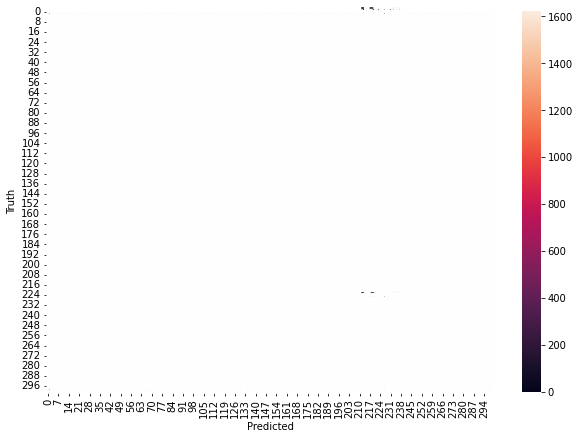

In [40]:
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(con_mat,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# The above confusion matrix shows 8+9 = 17 correct predictions and 3 incorrect ones

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



In [ ]:
y_pred_probability=LR.predict_proba(x_test)

In [ ]:
ypredprob_df=pd.DataFrame(data=y_pred_probability, columns=['Probability of a Crime (0)','Probability of No Crime (1)'])
ypredprob_df.head()

,Probability of a Crime (0),Probability of No Crime (1)
0,0.446405,0.553595
1,0.021137,0.978863
2,0.778869,0.221131
3,0.751138,0.248862
4,0.001016,0.998984


In [ ]:
TrueNegative=con_mat[0,0]
TruePositive=con_mat[1,1]
FalseNegative=con_mat[1,0]
FalsePositive=con_mat[0,1]
sensitivity=TruePositive/float(TruePositive+FalseNegative)
specificity=TrueNegative/float(TrueNegative+FalsePositive)

In [ ]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =       ',(TP+TN)/float(TP+TN+FP+FN),'\n',
'The Missclassification = 1-Accuracy =                  ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',
'Sensitivity or True Positive Rate = TP/(TP+FN) =       ',TP/float(TP+FN),'\n',
'Specificity or True Negative Rate = TN/(TN+FP) =       ',TN/float(TN+FP),'\n',
'Positive Predictive value = TP/(TP+FP) =               ',TP/float(TP+FP),'\n',
'Negative predictive Value = TN/(TN+FN) =               ',TN/float(TN+FN),'\n',
'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',
'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =        0.85 
 The Missclassification = 1-Accuracy =                   0.15000000000000002 
 Sensitivity or True Positive Rate = TP/(TP+FN) =        1.0 
 Specificity or True Negative Rate = TN/(TN+FP) =        0.7272727272727273 
 Positive Predictive value = TP/(TP+FP) =                0.75 
 Negative predictive Value = TN/(TN+FN) =                1.0 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  3.666666666666667 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.0


In [ ]:
from sklearn.preprocessing import binarize
for i in range(0,11):
    cm2=0
    y_pred_prob_yes=LR.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)

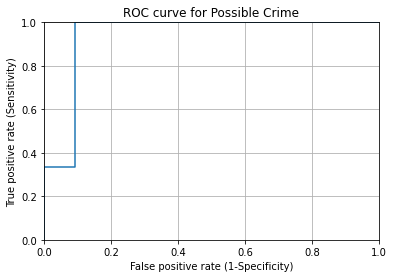

In [ ]:
from sklearn.metrics import roc_curve
FPrate, TPrate, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(FPrate,TPrate)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Possible Crime')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [ ]:
merge_df.columns

Index(['Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area Number', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'COMMUNITY AREA NAME', 'PERCENT OF HOUSING CROWDED',
       'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA', 'PER CAPITA INCOME '],
      dtype='object')

In [ ]:
merge_df.rename(columns={'COMMUNITY AREA NAME': 'COMMUNITY_AREA_NAME'})

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area Number,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,COMMUNITY_AREA_NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PER CAPITA INCOME
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12.0,61.0,08B,1165074.0,1875917.0,2015,2018-02-10 15:50:00,41.815117,-87.670000,"(41.815117282, -87.669999562)",New City,11.9,29.0,23.0,41.5,12765
10224832,HY411712,2015-09-04 17:00:00,013XX W 50TH ST,820,THEFT,$500 AND UNDER,RESIDENCE,False,True,933,9,16.0,61.0,6,1168281.0,1871609.0,2015,2018-02-10 15:50:00,41.803227,-87.658360,"(41.803227125, -87.658359911)",New City,11.9,29.0,23.0,41.5,12765
10224834,HY411767,2015-09-05 14:00:00,051XX S PAULINA ST,820,THEFT,$500 AND UNDER,STREET,False,False,932,9,16.0,61.0,6,1165878.0,1870680.0,2015,2018-02-10 15:50:00,41.800729,-87.667199,"(41.800729285, -87.667199258)",New City,11.9,29.0,23.0,41.5,12765
10224945,HY411865,2015-09-05 17:40:00,053XX S LAFLIN ST,2851,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE PORCH/HALLWAY,True,True,934,9,16.0,61.0,26,1167243.0,1869302.0,2015,2018-02-10 15:50:00,41.796919,-87.662233,"(41.796918756, -87.662232804)",New City,11.9,29.0,23.0,41.5,12765
10224948,HY411788,2015-09-05 12:20:00,051XX S HONORE ST,620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,932,9,16.0,61.0,5,1164884.0,1870635.0,2015,2018-02-10 15:50:00,41.800627,-87.670846,"(41.800626881, -87.670845863)",New City,11.9,29.0,23.0,41.5,12765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10247969,HY435644,2015-09-23 18:30:00,131XX S AVENUE M,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,433,4,10.0,55.0,08B,1201737.0,1818243.0,2015,2018-02-10 15:50:00,41.656000,-87.537473,"(41.65600049, -87.537472969)",Hegewisch,3.3,17.1,9.6,19.2,22677
10247979,HY435627,2015-09-23 18:40:00,031XX E 133RD ST,2012,NARCOTICS,MANU/DELIVER:COCAINE,STREET,True,False,433,4,10.0,55.0,18,1199249.0,1817374.0,2015,2018-02-10 15:50:00,41.653679,-87.546606,"(41.653678531, -87.546605613)",Hegewisch,3.3,17.1,9.6,19.2,22677
10249548,HY436824,2015-09-24 16:18:00,132XX S AVENUE N,530,ASSAULT,AGGRAVATED: OTHER DANG WEAPON,ALLEY,True,False,433,4,10.0,55.0,04A,1201412.0,1817767.0,2015,2018-02-10 15:50:00,41.654703,-87.538678,"(41.654702523, -87.538678203)",Hegewisch,3.3,17.1,9.6,19.2,22677


In [ ]:
merge_df.rename(columns={'PER CAPITA INCOME ': 'PER_CAPITA_INCOME'})

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area Number,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PER_CAPITA_INCOME
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12.0,61.0,08B,1165074.0,1875917.0,2015,2018-02-10 15:50:00,41.815117,-87.670000,"(41.815117282, -87.669999562)",New City,11.9,29.0,23.0,41.5,12765
10224832,HY411712,2015-09-04 17:00:00,013XX W 50TH ST,820,THEFT,$500 AND UNDER,RESIDENCE,False,True,933,9,16.0,61.0,6,1168281.0,1871609.0,2015,2018-02-10 15:50:00,41.803227,-87.658360,"(41.803227125, -87.658359911)",New City,11.9,29.0,23.0,41.5,12765
10224834,HY411767,2015-09-05 14:00:00,051XX S PAULINA ST,820,THEFT,$500 AND UNDER,STREET,False,False,932,9,16.0,61.0,6,1165878.0,1870680.0,2015,2018-02-10 15:50:00,41.800729,-87.667199,"(41.800729285, -87.667199258)",New City,11.9,29.0,23.0,41.5,12765
10224945,HY411865,2015-09-05 17:40:00,053XX S LAFLIN ST,2851,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE PORCH/HALLWAY,True,True,934,9,16.0,61.0,26,1167243.0,1869302.0,2015,2018-02-10 15:50:00,41.796919,-87.662233,"(41.796918756, -87.662232804)",New City,11.9,29.0,23.0,41.5,12765
10224948,HY411788,2015-09-05 12:20:00,051XX S HONORE ST,620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,932,9,16.0,61.0,5,1164884.0,1870635.0,2015,2018-02-10 15:50:00,41.800627,-87.670846,"(41.800626881, -87.670845863)",New City,11.9,29.0,23.0,41.5,12765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10247969,HY435644,2015-09-23 18:30:00,131XX S AVENUE M,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,433,4,10.0,55.0,08B,1201737.0,1818243.0,2015,2018-02-10 15:50:00,41.656000,-87.537473,"(41.65600049, -87.537472969)",Hegewisch,3.3,17.1,9.6,19.2,22677
10247979,HY435627,2015-09-23 18:40:00,031XX E 133RD ST,2012,NARCOTICS,MANU/DELIVER:COCAINE,STREET,True,False,433,4,10.0,55.0,18,1199249.0,1817374.0,2015,2018-02-10 15:50:00,41.653679,-87.546606,"(41.653678531, -87.546605613)",Hegewisch,3.3,17.1,9.6,19.2,22677
10249548,HY436824,2015-09-24 16:18:00,132XX S AVENUE N,530,ASSAULT,AGGRAVATED: OTHER DANG WEAPON,ALLEY,True,False,433,4,10.0,55.0,04A,1201412.0,1817767.0,2015,2018-02-10 15:50:00,41.654703,-87.538678,"(41.654702523, -87.538678203)",Hegewisch,3.3,17.1,9.6,19.2,22677
